# Spotify Linear Regression Project 🎵🎶
### Danceability: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

The purpose of this project is to build a predictive model that estimates a song's danceability score using key audio features including energy, acousticness, instrumentalness, valence, tempo, loudness, speechiness, liveness, duration, key, mode, and genre. By analyzing these predictors, the model provides actionable insights for music producers and sound engineers on a production company's board, enabling them to optimize song compositions during the creative process. Hopefully this will lead to boosted listener engagement and lead to data-driven decision making that align with market trends for hit-making potential in the music industry.

This is the dataset we initially started with (30000 songs, but noticed it only includes 5 genres): https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/data?select=spotify_songs.csv

# (1) EDA + Cleaning

This is a dataset that contains the top 10000 songs between 1950 and October 2024 from the Australian Recording Industry Association and Billboard charts: https://www.kaggle.com/datasets/joebeachcapital/top-10000-spotify-songs-1960-now

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import numpy as np

df2 = pd.read_csv('top_10000_1950-now.csv')

In [26]:
pd.set_option('display.max_columns', None)
df2.head()

Track URI                           Track Name  \
0  spotify:track:0vNPJrUrBnMFdCs8b2MTNG                                Fader   
1  spotify:track:0NpvdCO506uO58D4AbKzki                               Sherry   
2  spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P  I Took A Pill In Ibiza - Seeb Remix   
3  spotify:track:59lq75uFIqzUZcgZ4CbqFG                   Let Go for Tonight   
4  spotify:track:7KdcZQ3GJeGdserhK61kfv          The Way I Want To Touch You   

                                       Artist URI(s)  \
0              spotify:artist:4W48hZAnAHVOC2c8WH8pcq   
1              spotify:artist:6mcrZQmgzFGRWf7C0SObou   
2  spotify:artist:2KsP6tYLJlTBvSUxnwlVWa, spotify...   
3              spotify:artist:7qRll6DYV06u2VuRPAVqug   
4              spotify:artist:7BEfMxbaqx6dOpbtlEqScm   

                     Artist Name(s)                             Album URI  \
0                   The Temper Trap  spotify:album:0V59MMtgoruvEqMv18KAOH   
1  Frankie Valli & The Four Seasons  spotify:album:0NUEQILaBzavnzcMEs4buZ   
2                 Mike Posner, Seeb  spotify:album:1Tz3Ai1guEFf4hV3d9i17K   
3                             Foxes  spotify:album:5AQ7uKRSpAv7SNUl4j24ru   
4                Captain & Tennille  spotify:album:3GUxesVyOehInaxJyCTh6d   

                                       Album Name  \
0                       Conditions (Tour Edition)   
1  The Very Best of Frankie Valli & The 4 Seasons   
2                                At Night, Alone.   
3                               Glorious (Deluxe)   
4                      Love Will Keep Us Together   

                     Album Artist URI(s)              Album Artist Name(s)  \
0  spotify:artist:4W48hZAnAHVOC2c8WH8pcq                   The Temper Trap   
1  spotify:artist:6mcrZQmgzFGRWf7C0SObou  Frankie Valli & The Four Seasons   
2  spotify:artist:2KsP6tYLJlTBvSUxnwlVWa                       Mike Posner   
3  spotify:artist:7qRll6DYV06u2VuRPAVqug                             Foxes   
4  spotify:artist:7BEfMxbaqx6dOpbtlEqScm                Captain & Tennille   

  Album Release Date                                    Album Image URL  \
0               2009  https://i.scdn.co/image/ab67616d0000b273f86ae8...   
1         2003-01-14  https://i.scdn.co/image/ab67616d0000b273b96c21...   
2         2016-05-06  https://i.scdn.co/image/ab67616d0000b273a19be7...   
3         2014-05-12  https://i.scdn.co/image/ab67616d0000b273ae5c7d...   
4         1975-01-01  https://i.scdn.co/image/ab67616d0000b273e21a28...   

   Disc Number  Track Number  Track Duration (ms)  \
0            1             6               192373   
1            1             1               152160   
2            1            13               197933   
3            1             5               238413   
4            1             3               163586   

                                   Track Preview URL  Explicit  Popularity  \
0  https://p.scdn.co/mp3-preview/14264bd1501d2723...     False           0   
1  https://p.scdn.co/mp3-preview/e3f765262ebc349e...     False          54   
2  https://p.scdn.co/mp3-preview/7bae6aac6d699135...      True          63   
3  https://p.scdn.co/mp3-preview/84a003d72f9f1468...     False          39   
4  https://p.scdn.co/mp3-preview/9e7a4a7b7dc56dc3...     False          35   

           ISRC                  Added By              Added At  \
0  GBZUZ0900014  spotify:user:bradnumber1  2021-08-08T09:26:31Z   
1  USRH10175197  spotify:user:bradnumber1  2021-08-08T09:26:31Z   
2  USUM71509342  spotify:user:bradnumber1  2021-08-08T09:26:31Z   
3  GBARL1301249  spotify:user:bradnumber1  2021-08-08T09:26:31Z   
4  USAM10110025  spotify:user:bradnumber1  2021-08-08T09:26:31Z   

                                       Artist Genres  Danceability  Energy  \
0               indietronica,modern rock,shimmer pop         0.532   0.760   
1  adult standards,bubblegum pop,doo-wop,lounge,n...         0.703   0.478   
2          dance pop,pop,pop dance,pop rap,pop dance         0.664   0.714   
3      

In [27]:
keep_columns = [
    'Track URI', 'Track Name', 'Artist Name(s)', 
    'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
    'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
    'Valence', 'Tempo', 'Track Duration (ms)',
    'Artist Genres', 'Explicit'
]
df2_subset = df2[keep_columns].copy()

## Visualize and measure kurtosis and skew

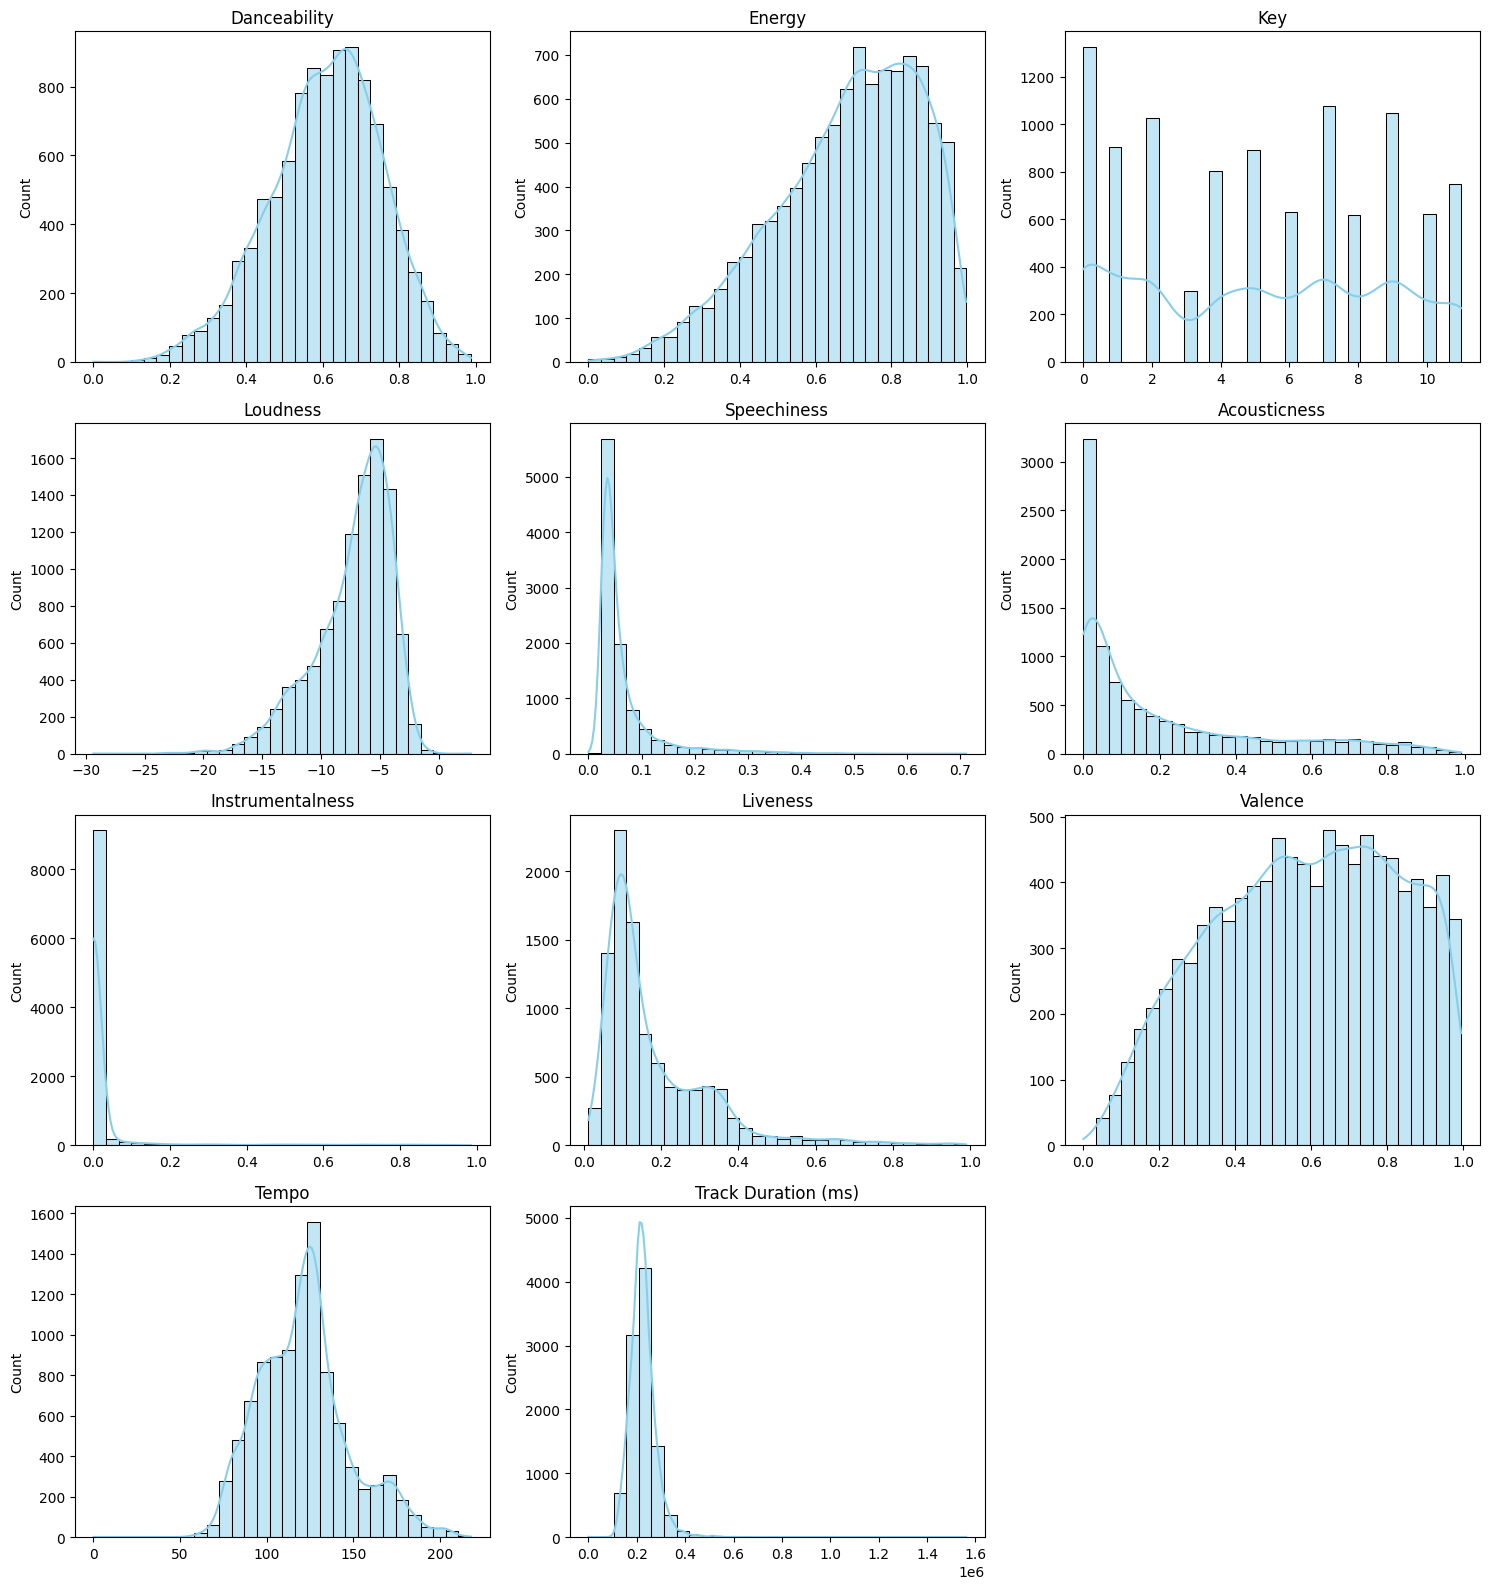

In [28]:
# Select numeric columns
numeric_cols = [
    'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Track Duration (ms)'
]

# Set up the plot grid
num_cols = 3  # number of plots per row
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols*5, num_rows*4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df2_subset[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [29]:
df2_subset[numeric_cols] = df2_subset[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate skewness and kurtosis
stats_df = pd.DataFrame({
    'Skewness': df2_subset[numeric_cols].apply(lambda x: skew(x.dropna())),
    'Kurtosis': df2_subset[numeric_cols].apply(lambda x: kurtosis(x.dropna(), fisher=True))
})

stats_df

Skewness   Kurtosis
Danceability        -0.313820  -0.078175
Energy              -0.641341  -0.169417
Key                  0.026116  -1.292687
Loudness            -1.050121   1.246128
Speechiness          3.281138  13.280137
Acousticness         1.296880   0.573714
Instrumentalness     5.224732  28.145979
Liveness             2.077852   5.344333
Valence             -0.201451  -0.954207
Tempo                0.530200   0.308520
Track Duration (ms)  2.964346  46.707199

## Log transform skewed fields

In [30]:
skewed_cols = ['Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Track Duration (ms)']

df_transformed = df2_subset.copy()

for col in skewed_cols:
    min_val = df_transformed[col].min()
    if min_val <= 0:
        # Shift to make all values positive
        shift = abs(min_val) + 1e-6
    else:
        shift = 0
    df_transformed[col + '_log'] = np.log(df_transformed[col] + shift)

# Check new skewness and kurtosis
log_cols = [col + '_log' for col in skewed_cols]
skew_kurt = pd.DataFrame({
    'Skewness': df_transformed[log_cols].skew(),
    'Kurtosis': df_transformed[log_cols].kurtosis()
})

print(skew_kurt)

                          Skewness     Kurtosis
Speechiness_log           0.705233    11.122522
Acousticness_log         -1.067573     0.948114
Instrumentalness_log      0.922560    -0.349456
Liveness_log              0.324278    -0.305828
Track Duration (ms)_log -44.131318  2667.364463


Speechiness, instrumentalness, and liveness look better now. Track duration (ms) was completely broken by a log transform so we won't keep the transformed version. Acousticness was also a bit overcorrected and is now left-skewed so we may just move forward without completely meeting normality assumptions.

In [31]:
# Rename and compile new df with some variables transformed

# Start from df2_subset
df_final = df2_subset.copy()

# Rename columns
df_final.rename(columns={
    'Track URI': 'track_id',
    'Track Name': 'track_name',
    'Artist Name(s)': 'artist_names',
    'Danceability': 'danceability',
    'Energy': 'energy',
    'Key': 'key',
    'Loudness': 'loudness',
    'Mode': 'mode',
    'Speechiness': 'speechiness',
    'Acousticness': 'acousticness',
    'Instrumentalness': 'instrumentalness',
    'Liveness': 'liveness',
    'Valence': 'valence',
    'Tempo': 'tempo',
    'Track Duration (ms)': 'track_duration_ms',
    'Artist Genres': 'artist_genres',
    'Explicit': 'explicit'
}, inplace=True)

# Log-transform selected skewed variables
for col in ['speechiness', 'instrumentalness', 'liveness']:
    min_val = df_final[col].min()
    shift = abs(min_val) + 1e-6 if min_val <= 0 else 0
    df_final[col + '_log'] = np.log(df_final[col] + shift)

# Display final dataframe columns
df_final.head()

track_id                           track_name  \
0  spotify:track:0vNPJrUrBnMFdCs8b2MTNG                                Fader   
1  spotify:track:0NpvdCO506uO58D4AbKzki                               Sherry   
2  spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P  I Took A Pill In Ibiza - Seeb Remix   
3  spotify:track:59lq75uFIqzUZcgZ4CbqFG                   Let Go for Tonight   
4  spotify:track:7KdcZQ3GJeGdserhK61kfv          The Way I Want To Touch You   

                       artist_names  danceability  energy   key  loudness  \
0                   The Temper Trap         0.532   0.760  11.0    -7.123   
1  Frankie Valli & The Four Seasons         0.703   0.478   7.0    -8.062   
2                 Mike Posner, Seeb         0.664   0.714   7.0    -6.645   
3                             Foxes         0.543   0.808   9.0    -6.615   
4                Captain & Tennille         0.664   0.585   0.0    -7.062   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0   0.0       0.0353      0.000101          0.690000    0.0752    0.158   
1   1.0       0.0441      0.626000          0.000000    0.1130    0.734   
2   0.0       0.1110      0.035300          0.000008    0.0843    0.710   
3   0.0       0.0632      0.042900          0.000002    0.3260    0.299   
4   0.0       0.0248      0.624000          0.000112    0.3430    0.597   

     tempo  track_duration_ms  \
0  134.974             192373   
1  117.562             152160   
2  101.969             197933   
3  140.064             238413   
4  111.290             163586   

                                       artist_genres  explicit  \
0               indietronica,modern rock,shimmer pop     False   
1  adult standards,bubblegum pop,doo-wop,lounge,n...     False   
2          dance pop,pop,pop dance,pop rap,pop dance      True   
3                     electropop,metropopolis,uk pop     False   
4                   mellow gold,soft rock,yacht rock     False   

   speechiness_log  instrumentalness_log  liveness_log  
0        -3.343844             -0.371062     -2.587604  
1        -3.121273            -13.815511     -2.180367  
2        -2.198216            -11.572675     -2.473373  
3        -2.761435            -12.844732     -1.120858  
4        -3.696871             -9.088123     -1.070025

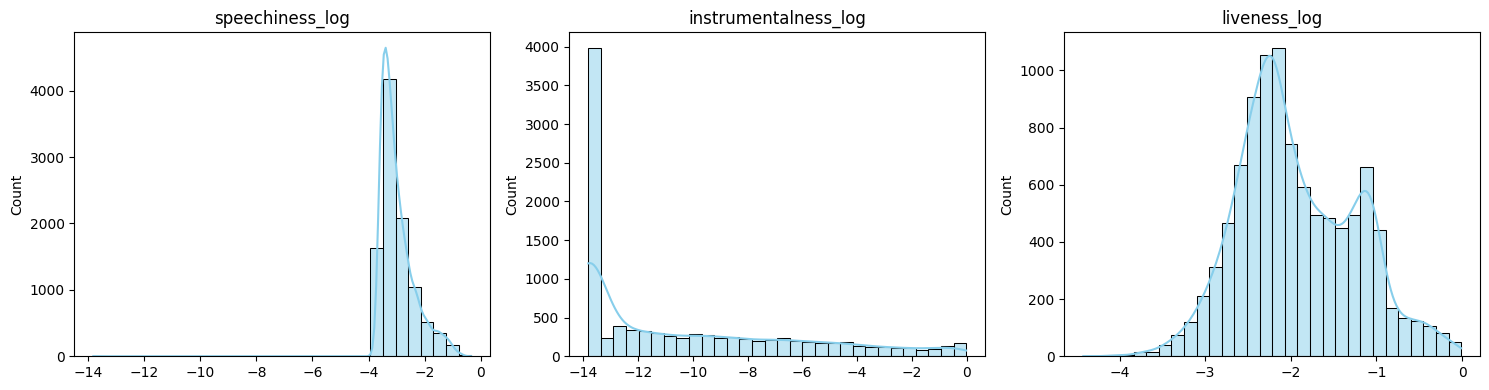

In [32]:
# List of numeric columns to visualize
numeric_cols = [
    'speechiness_log', 'instrumentalness_log', 'liveness_log'
]

num_cols = 3  # number of plots per row
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols*5, num_rows*4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_final[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Sort by artist genre

In [33]:
# Split comma-separated genres into lists
df2_subset['Artist Genres List'] = df2_subset['Artist Genres'].str.split(',')

# Explode the lists so each genre gets its own row
df_exploded = df2_subset.explode('Artist Genres List')

# Strip whitespace just in case
df_exploded['Artist Genres List'] = df_exploded['Artist Genres List'].str.strip()

# Get unique genres
unique_genres = df_exploded['Artist Genres List'].unique()
print(f"Number of unique genres: {len(unique_genres)}")

Number of unique genres: 908


You can take a look at this ChatGPT chat where I gave it less granular genres to sort this whole list into: https://chatgpt.com/share/68d37cb8-07c0-8007-bd33-d76d5c1b28fc

In [34]:
genre_mapping = {
"rock": [
'modern rock', 'rock-and-roll', 'rockabilly', 'soft rock', 'yacht rock', 'album rock',
'classic rock', 'rock', 'hard rock', 'classic garage rock', 'merseybeat', 'australian rock',
'folk rock', 'pop rock', 'post-grunge', 'alternative rock', 'dance rock', 'electronic rock',
'kiwi rock', 'psychedelic rock', 'glam rock', 'piano rock', 'british invasion', 'post-punk',
'uk post-punk', 'indie rock', 'australian alternative rock', 'australian indie rock',
'british alternative rock', 'punk', 'adelaide punk', 'ska punk', 'skate punk', 'emo',
'pop punk', 'neon pop punk', 'britpop', 'britpop revival', 'garage rock', 'garage rock revival',
'psychedelic blues-rock', 'psychedelic folk rock', 'progressive rock', 'progressive metal',
'metal', 'glam metal', 'nu metal', 'metalcore', 'stoner metal', 'proto-metal', 'psychedelic punk',
'psychobilly', 'screamo', 'post-punk', 'pub rock', 'slacker rock', 'shoegaze', 'noise rock',
'spacegrunge', 'alternative pop rock', 'modern alternative rock', 'modern power pop',
'power pop', 'rock drums', 'cosmic american', 'swamp rock', 'heartland rock', 'surf music',
'irish rock', 'german rock', 'boston rock', 'canadian rock', 'canadian metal', 'german hard rock',
'swedish hard rock', 'swedish melodic rock', 'swedish indie rock', 'welsh rock', 'dutch rock',
'argentine rock', 'rock nacional', 'rock independant francais', 'indie rock italiano',
'acid rock', 'african rock', 'alaska indie', 'alternative dance', 'art rock', 'athens indie', 'auckland indie', 'aussie emo', 'australian alternative pop', 'australian garage punk', 'australian indie', 'australian psych', 'australian surf rock', 'beatlesque', 'belgian rock', 'bergen indie', 'brighton indie', 'brisbane indie', 'british indie rock', 'brooklyn indie', 'bubblegrunge', 'c86', 'canadian indie', 'canadian rockabilly', 'canadian trap', 'canterbury scene', 'celtic rock', 'chapel hill sound', 'charlottesville indie', 'chicago indie', 'christian alternative rock', 'classic canadian rock', 'comedy rock', 'coventry indie', 'czech singer-songwriter', 'derby indie', 'detroit rock', 'devon indie', 'dunedin sound', 'dutch prog', 'experimental rock', 'finnish alternative rock', 'flute rock', 'freakbeat', 'fremantle indie', 'french rock', 'french shoegaze', 'french synthpop', 'grebo', 'grunge', 'icelandic indie', 'icelandic rock', 'indie salvadoreno', 'israeli rock', 'jam band', 'la indie', 'lancashire indie', 'leicester indie', 'liverpool indie', 'madchester', 'manchester indie', 'melbourne indie', 'mexican classic rock', 'michigan indie', 'modern folk rock', 'nashville indie', 'neo-psychedelic', 'new jersey indie', 'northern irish indie', 'nottingham indie', 'olympia wa indie', 'ontario indie', 'oxford indie', 'paisley underground', 'palm desert scene', 'perth indie', 'philly indie', 'pop emo', 'portland indie', 'pov: indie', 'rap rock', 'rochester ny indie', 'rock keyboard', 'rock of gibraltar', 'rock progressif francais', 'roots rock', 'sacramento indie', 'scottish indie', 'scottish rock', 'sheffield indie', 'sleaze rock', 'south african rock', 'southern rock', 'spanish invasion', 'stoner rock', 'symphonic rock', 'synth prog', 'tempe indie', 'traditional rockabilly', 'trop rock', 'uk rockabilly', 'underground power pop', 'german pop rock', 'pittsburgh rock', 'zolo'
],
"pop": [
'shimmer pop', 'bubblegum pop', 'dance pop', 'pop', 'pop dance', 'electropop', 'metropopolis',
'uk pop', 'mellow gold', 'adult standards', 'doo-wop', 'lounge', 'post-teen pop', 'art pop',
'canadian pop', 'girl group', 'boy band', 'viral pop', 'singer-songwriter pop', 'candy pop',
'pixie', 'post-disco', 'sunshine pop', 'neo mellow', 'pop rock', 'sophisti-pop', 'pop soul',
'indie pop', 'modern indie pop', 'bedroom pop', 'indie electropop', 'indie pop rap', 'indie soul',
'gauze pop', 'barbadian pop', 'pop quebecois', 'pop urbaine', 'pop edm', 'pop house', 'latin pop',
'italian pop', 'icelandic pop', 'french pop', 'norwegian pop', 'romanian pop', 'austrian pop',
'brazilian pop', 'scandinavian pop', 'nz pop', 'canadian electropop', 'canadian pop punk',
'canadian psychedelic', 'canadian singer-songwriter', 'swedish pop', 'swedish indie pop',
'baroque pop', 'operatic pop', 'chamber pop', 'italian adult pop', 'collage pop', 'la pop',
'viral trap', 'hyperpop', 'antiviral pop', 'modern alternative pop', 'bboy', 'pixel', 'stomp pop',
'deep dance pop', 'bubblegum dance', 'deep eurodance', 'deep disco', 'classic belgian pop',
'belgian pop', 'belgian dance', 'super eurobeat', 'italo disco', 'italo dance', 'italo house',
'euphoric hardstyle', 'classic hardstyle', 'deep minimal techno', 'melodic dubstep',
'deep tropical house', 'tropical', 'trance', 'vocal trance', 'hands up', 'melbourne bounce',
'melbourne bounce international', 'bouncy house', 'future house', 'bass house', 'deep tech house',
'tech house', 'progressive house', 'classic house', 'disco house', 'tribal house', 'house',
'electro house', 'progressive electro house', 'hi-nrg', 'deep euro house', 'float house',
'microhouse', 'garage house', 'vocal house', 'dj remix product', 'itopop', 'pop violin',
'post-disco', 'ethereal wave', 'etherpop', 'dream pop', 'indietronica', 'aussietronica',
'a cappella', 'acoustic pop', 'alt z', 'alternative pop', 'ambient pop', 'australian americana', 'australian electropop', 'australian pop', 'australian talent show', 'austropop', 'bahamian pop', 'brill building pop', 'classic danish pop', 'classic girl group', 'classic greek pop', 'classic nz pop', 'classic schlager', 'classic swedish pop', 'classic uk pop', 'colombian pop', 'dance-punk', 'danish pop', 'dansktop', 'dark pop', 'deep adult standards', 'deep soft rock', 'deep talent show', 'disco', 'dutch pop', 'early synthpop', 'easy listening', 'electropowerpop', 'escape room', 'europop', 'french indie pop', 'hopebeat', 'icelandic singer-songwriter', 'indie poptimism', 'irish pop', 'israeli pop', 'italian lounge', 'jangle pop', 'jordanian pop', 'k-pop', 'k-pop boy group', 'k-pop girl group', 'latin arena pop', 'latin viral pop', 'mandopop', 'mexican pop', 'modern alternative pop', 'neo-synthpop', 'neue deutsche welle', 'new romantic', 'new wave', 'new wave pop', 'noise pop', 'nyc pop', 'permanent wave', 'pop nacional', 'pop reggaeton', 'scandipop', 'schlager', 'scottish new wave', 'shiver pop', 'social media pop', 'solo wave', 'south african pop dance', 'space age pop', 'swedish electropop', 'swedish idol pop', 'swedish synthpop', 'synthpop', 'taiwan pop', 'talent show', 'teen pop', 'torch song', 'transpop', 'uk alternative pop', 'variete francaise', 'vocal harmony group', 'deep new wave', 'german pop', 'nederpop'
],
"r&b": [
'r&b', 'urban contemporary', 'neo soul', 'contemporary r&b', 'new jack swing', 'pop r&b',
'alternative r&b', 'deep r&b', 'gospel r&b', 'soul blues', 'rhythm and blues', 'quiet storm',
'classic soul', 'southern soul', 'uk contemporary r&b', 'canadian r&b', 'australian r&b',
'dark r&b', 'funk', 'funk pop', 'funk rock', 'funktronica', 'jazz funk', 'soul',
'beach music', 'brit funk', 'british soul', 'canadian contemporary r&b', 'chicago soul', 'funk rj', 'indie r&b', 'instrumental funk', 'instrumental soul', 'memphis soul', 'minneapolis sound', 'modern funk', 'new orleans funk', 'new orleans soul', 'northern soul', 'p funk', 'philly soul', 'psychedelic soul', 'souldies', 'swedish soul', 'synth funk', 'motown'
],
"edm": [
'edm', 'diva house', 'eurodance', 'hip house', 'filter house', 'uk dance', 'electro',
'electronica', 'big beat', 'nu skool breaks', 'trip hop', 'brostep', 'progressive electro house',
'electro house', 'slap house', 'deep groove house', 'deep house', 'progressive house',
'house', 'progressive trance', 'trance', 'future house', 'bass house', 'deep tech house',
'tech house', 'electroclash', 'microhouse', 'garage house', 'vocal house', 'disco house',
'tribal house', 'classic house', 'classic hardstyle', 'euphoric hardstyle', 'hands up',
'hi-nrg', 'melbourne bounce', 'melbourne bounce international', 'bouncy house', 'deep euro house',
'float house', 'bubble trance', 'vapor twitch', 'deep disco', 'deep dance pop', 'italo dance',
'italo disco', 'italo house', 'belgian dance', 'german dance', 'dutch house', 'dutch trance',
'finnish edm', 'electronic trap', 'complextro', 'progressive electro house',
'2-step', 'acid house', 'ambient house', 'australian dance', 'australian house', 'belgian edm', 'big room', 'bolobedu house', 'breakbeat', 'breaks', 'canadian electronic', 'cantaditas', 'classic dubstep', 'classic progressive house', 'cyberpunk', 'dancefloor dnb', 'danish electronic', 'deep disco house', 'downtempo', 'dream trance', 'drum and bass', 'dutch edm', 'electra', 'electro swing', 'electrofox', 'experimental house', 'fidget house', 'filthstep', 'flamenco electronica', 'frankfurt electronic', 'freestyle', 'future garage', 'gabber', 'german house', 'german techno', 'german trance', 'hamburg electronic', 'happy hardcore', 'hardcore techno', 'hypertechno', 'intelligent dance music', 'italian trance', 'jungle', 'latin house', 'minimal techno', 'moombahton', 'new beat', 'new rave', 'nu disco', 'proto-techno', 'ragga jungle', 'rave', 'sky room', 'south african house', 'speed garage', 'stutter house', 'swedish tropical house', 'trancecore', 'tropical house', 'uk dnb', 'uk funky', 'uk garage', 'uk house', 'uk tech house', 'vintage french electronic'
],
"classical": [
'opera', 'classical tenor', 'baroque pop', 'gregorian dance', 'classical', 'classical soundtrack',
'classical adult', 'light music', "man's orchestra",
'italian tenor'
],
"jazz": [
'jazz', 'jazz pop', 'vocal jazz', 'jazz blues', 'soul jazz', 'jazz fusion', 'jazz guitar',
'jazz quartet', 'jazz piano', 'jazz saxophone', 'jazz clarinet', 'jazz organ', 'smooth jazz',
'bebop', 'hard bop', 'contemporary post-bop', 'chicago bop', 'swing', 'swing italiano', 'acid jazz',
'electro jazz',
'big band', 'cabaret', 'contemporary vocal jazz', 'dixieland', 'hammond organ', 'harlem renaissance', 'jazz cover', 'jazz rock', 'jazz trumpet', 'new orleans jazz', 'ska jazz', 'smooth saxophone', 'south african jazz', 'swedish jazz'
],
"country": [
'contemporary country', 'country', 'country dawn', 'country road', 'classic country pop',
'country rock', 'classic australian country', 'classic texas country', 'outlaw country',
'cowboy western', 'nashville sound', 'traditional country', 'western swing', 'country pop',
'neo-traditional country', 'texas blues', 'australian country', 'bush ballad', 'country gospel',
'modern country rock', 'irish country', 'south african country', 'classic nz country',
'alternative country', 'arkansas country', 'bakersfield sound', 'banjo', 'canadian country', 'classic oklahoma country', 'honky tonk', 'honky-tonk piano', 'new americana', 'swedish country', 'truck-driving country', 'uk americana', 'yodeling'
],
"folk": [
'folk', 'folk-pop', 'singer-songwriter', 'nz singer-songwriter', 'scottish singer-songwriter',
'american folk revival', 'indie folk', 'australian indie folk', 'neo-singer-songwriter',
'chamber folk', 'irish folk', 'black americana', 'indie anthem-folk', 'cosmic american',
'acoustic cover', 'anti-folk', 'austin singer-songwriter', 'australian singer-songwriter', 'british folk', 'canadian celtic', 'canadian folk', 'celtic', 'ectofolk', 'gen z singer-songwriter', 'irish pub song', 'irish singer-songwriter', 'lilith', 'modern indie folk', 'nz folk', 'psychedelic folk', 'shanty', 'stomp and holler'
],
"punk": [
'punk', 'adelaide punk', 'ska punk', 'skate punk', 'pop punk', 'neon pop punk', 'emo',
'post-punk', 'uk post-punk', 'art punk', 'glam punk', 'psychobilly', 'hardcore punk',
'anarcho-punk', 'synth punk', 'cowpunk', 'punk blues', 'british punk', 'britcore', 'mod revival',
'acoustic punk', 'boston punk', 'canadian punk', 'chicago hardcore', 'chicago punk', 'northern irish punk', 'protopunk', 'riot grrrl', 'ruta destroy', 'socal pop punk', 'texas pop punk'
],
"metal": [
'metal', 'glam metal', 'nu metal', 'metalcore', 'proto-metal', 'industrial metal', 'industrial rock',
'hard rock', 'german metal', 'argentine heavy metal', 'birmingham metal', 'stoner metal',
'psychedelic punk', 'thrash metal', 'industrial', 'death metal', 'black metal',
'alternative metal', 'comic metal', 'funk metal', 'hel', 'nwobhm', 'old school thrash', 'rap metal'
],
"rap": [
'rap', 'pop rap', 'hip pop', 'old school hip hop', 'queens hip hop', 'atl hip hop',
'dirty south rap', 'old school atlanta hip hop', 'southern hip hop', 'trap', 'chicago rap',
'melodic rap', 'detroit hip hop', 'south carolina hip hop', 'trap soul', 'latin hip hop',
'puerto rican pop', 'trap latino', 'miami bass', 'miami hip hop', 'atl trap', 'political hip hop',
'pittsburgh rap', 'new jersey underground rap', 'chicano rap', 'nigerian hip hop', 'dfw rap',
'new orleans rap', 'houston rap', 'rhode island rap', 'oakland hip hop', 'westcoast flow',
'birmingham hip hop', 'london rap', 'texas latin rap', 'k-rap', 'nashville hip hop',
'alabama rap', 'australian trap', 'battle rap', 'cali rap', 'dark trap', 'gangster rap', 'horrorcore', 'jazz rap', 'meme rap', 'new jersey rap', 'nyc rap', 'philly rap', 'rap francais', 'rap kreyol', 'rap latina', 'sad rap', 'st louis rap', 'texas pop punk', 'trap queen', 'traphall', 'urbano latino', 'west coast rap'
],
"hip-hop": [
'hip hop', 'golden age hip hop', 'alternative hip hop', 'australian hip hop', 'australian underground hip hop',
'underground hip hop', 'brooklyn drill', 'drill', 'afroswing', 'afrofuturism', 'afro soul',
'bboy', 'beatboxing', 'experimental hip hop', 'traprun', 'viral trap', 'comedy rap', 'emo rap',
'asian american hip hop', 'atlanta bass', 'atlantic canada hip hop', 'australian indigenous hip hop', 'bronx hip hop', 'birmingham grime', 'canadian hip hop', 'canadian old school hip hop', 'chicago drill', 'conscious hip hop', 'crunk', 'deep underground hip hop', 'desi hip hop', 'east coast hip hop', 'french hip hop', 'g funk', 'grime', 'hardcore hip hop', 'harlem hip hop', 'hyphy', 'jamaican hip hop', 'kentucky hip hop', 'korean old school hip hop', 'lgbtq+ hip hop', 'melodic drill', 'memphis hip hop', 'minnesota hip hop', 'mississippi hip hop', 'north carolina hip hop', 'nz hip hop', 'ohio hip hop', 'pinoy hip hop', 'seattle hip hop', 'tennessee hip hop', 'uk hip hop', 'virginia hip hop', 'west australian hip hop', 'wu fam', 'instrumental grime'
],
"blues": [
'blues', 'blues rock', 'british blues', 'electric blues', 'piano blues', 'modern blues', 'modern blues rock',
'memphis blues', 'swamp blues', 'acoustic blues', 'soul blues',
'canadian blues', 'louisiana blues', 'new orleans blues', 'swamp pop', 'traditional blues'
],
"reggae": [
'reggae', 'roots reggae', 'reggae fusion', 'modern reggae', 'dancehall', 'uk dancehall',
'lovers rock', 'rocksteady', 'jamaican ska', 'ska', 'ska revival', 'reggae do maranhao',
'virgin islands reggae', 'nz reggae', 'australian reggae fusion',
'australian ska', 'calypso', 'dancehall queen', 'deep ragga', 'old school dancehall', 'reggaeton', 'reggaeton colombiano', 'soca', 'uk reggae', 'vincy soca', 'early reggae'
],
"world-music": [
'afrobeats', 'bhangra', 'classic bhangra', 'mbalax', 'funana', 'azonto', 'opm',
'pacific islands pop', 'solomon islands pop', 'melanesian pop', 'indonesian hip hop',
'ghanaian alternative', 'afrikaans', 'native american traditional', 'native american contemporary',
'didgeridoo', 'volksmusik', 'canzone napoletana', 'balkan beats',
'afropop', 'alte', 'australian indigenous music', 'classic bhangra', 'enka', 'filmi', 'hawaiian', 'hmong pop', 'kwaito', 'modern salsa', 'new mexico music', 'nigerian pop', 'oktoberfest', 'pagode baiano', 'png pop', 'polka', 'salsa', 'south african pop', 'world', 'zouk'
],
"other": [
'comedy', 'novelty', 'karaoke', 'idol', 'theme', 'musical advocacy', 'cartoon', 'show tunes',
'broadway', 'west end', 'vapor soul', 'hyperpop', 'experimental', 'poetry', 'writing',
'channel islands indie', 'remix product', 'covertronica', 'experimental pop', 'experimental vocal',
'icelandic experimental', 'vapor twitch', 'vogue', 'video game music', 'wrestling', 'supergroup',
'vaudeville', 'ccm', "women's music", 'library music', 'soundtrack', 'classic soundtrack',
"australian children's music", 'australian comedy', "british children's music", 'british comedy', 'canadian latin', 'christian music', 'comic', 'double drumming', 'football', 'german show tunes', 'german soundtrack', 'gospel', 'halloween', 'hollywood', 'instrumental surf', 'instrumental worship', 'lo-fi', 'melancholia', 'military cadence', 'moog', 'movie tunes', 'muzica crestina', 'nz christian', 'parody', 'persian pop', 'sad lo-fi', 'speedrun', 'synthesizer', 'nordic soundtrack'
]
}

## One-hot encoding genre

In [35]:
# Function to map artist genres to high-level genres
def map_genres_to_columns(artist_genres):
    one_hot = {genre: 0 for genre in genre_mapping.keys()}
    # Make sure we have a list of genres
    if isinstance(artist_genres, str):
        artist_genres_list = [g.strip().lower() for g in artist_genres.split(',')]
    elif isinstance(artist_genres, list):
        artist_genres_list = [g.lower() for g in artist_genres]
    else:
        return one_hot
    for high_level, subgenres in genre_mapping.items():
        subgenres_lower = [sg.lower() for sg in subgenres]
        # If any subgenre matches exactly one of the artist genres
        if any(g in subgenres_lower for g in artist_genres_list):
            one_hot[high_level] = 1
    return one_hot

# Apply row-wise to get one-hot encoding
one_hot_df = df_final['artist_genres'].apply(map_genres_to_columns).apply(pd.Series)

# Remove any duplicate genre columns if they exist
one_hot_df = one_hot_df.loc[:, ~one_hot_df.columns.duplicated()]

# Merge back into df_final
df_final = pd.concat([df_final, one_hot_df], axis=1)

## Make sure GPT didn't miss any subgenres

I used the code below a few times to make sure the rest of the subgenres were sorted.

In [36]:
# Collect all unique genres from 'artist_genres'
all_genres = set()
for artist_genres in df_final['artist_genres'].dropna():  # Skip NaN rows
    if isinstance(artist_genres, str):
        genres_list = [g.strip().lower() for g in artist_genres.split(',')]
    elif isinstance(artist_genres, list):
        genres_list = [g.lower() for g in artist_genres]
    else:
        continue
    all_genres.update(genres_list)

# Flatten all subgenres from genre_mapping
mapped_subgenres = set()
for subgenres in genre_mapping.values():
    mapped_subgenres.update([sg.lower() for sg in subgenres])

# Find missing subgenres
missing_genres = all_genres - mapped_subgenres

# Output the result
if not missing_genres:
    print("No subgenres are missing from genre_mapping.")
else:
    print("Missing subgenres:", sorted(missing_genres))

No subgenres are missing from genre_mapping.


Grok gave me an updated dictionary including all subgenres. Replaced dictionary above.
https://grok.com/share/c2hhcmQtMg%3D%3D_92865531-9297-46fb-a585-a687efdc276f

In [37]:
df_final.describe()

danceability       energy          key    loudness         mode  \
count   9995.000000  9995.000000  9995.000000  9995.00000  9995.000000   
mean       0.608355     0.684050     5.171686    -7.25158     0.698249   
std        0.145727     0.191107     3.583496     3.27837     0.459041   
min        0.000000     0.000020     0.000000   -29.36800     0.000000   
25%        0.515500     0.561000     2.000000    -9.01900     0.000000   
50%        0.618000     0.713000     5.000000    -6.49500     1.000000   
75%        0.710000     0.836000     8.000000    -4.87800     1.000000   
max        0.988000     0.997000    11.000000     2.76900     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  9995.000000   9995.000000       9995.000000  9995.000000  9995.000000   
mean      0.065028      0.208264          0.029431     0.185236     0.586313   
std       0.061050      0.248940          0.123842     0.148270     0.238929   
min       0.000000      0.000003          0.000000     0.012000     0.000000   
25%       0.033100      0.018200          0.000000     0.089150     0.399500   
50%       0.042900      0.095300          0.000006     0.127000     0.599000   
75%       0.067550      0.317000          0.000569     0.245000     0.783000   
max       0.711000      0.991000          0.985000     0.989000     0.995000   

             tempo  track_duration_ms  speechiness_log  instrumentalness_log  \
count  9995.000000       1.000000e+04      9995.000000           9995.000000   
mean    121.530226       2.241931e+05        -2.966648            -10.290199   
std      26.231119       5.418227e+04         0.610107              4.052645   
min       0.000000       0.000000e+00       -13.815511            -13.815511   
25%     102.776500       1.920728e+05        -3.408192            -13.815511   
50%     120.753000       2.194130e+05        -3.148860            -11.901533   
75%     134.307000       2.498162e+05        -2.694873             -7.468998   
max     217.913000       1.561133e+06        -0.341081             -0.015113   

       liveness_log          rock          pop           r&b           edm  \
count   9995.000000  10000.000000  10000.00000  10000.000000  10000.000000   
mean      -1.934432      0.425400      0.67720      0.125200      0.121200   
std        0.686284      0.494428      0.46757      0.330962      0.326376   
min       -4.422849      0.000000      0.00000      0.000000      0.000000   
25%       -2.417435      0.000000      0.00000      0.000000      0.000000   
50%       -2.063568      0.000000      1.00000      0.000000      0.000000   
75%       -1.406497      1.000000      1.00000      0.000000      0.000000   
max       -0.011061      1.000000      1.00000      1.000000      1.000000   

          classical          jazz      country          folk          punk  \
count  10000.000000  10000.000000  10000.00000  10000.000000  10000.000000   
mean       0.005300      0.012800      0.04350      0.071600      0.025800   
std        0.072612      0.112416      0.20399      0.257837      0.158546   
min        0.000000      0.000000      0.00000      0.000000      0.000000   
25%        0.000000      0.000000      0.00000      0.000000      0.000000   
50%        0.000000      0.000000      0.00000      0.000000      0.000000   
75%        0.000000      0.000000      0.00000      0.000000      0.000000   
max        1.000000      1.000000      1.00000      1.000000      1.000000   

              metal           rap       hip-hop         blues        reggae  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.067400      0.097000      0.058900      0.016400      0.012500   
std        0.250726      0.295973      0.235449      0.127014      0.111108   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.00000

## Draw a random sample so we have n < 5000 for shorter regression runtime

In [38]:
# Draw a random sample of 5000 rows
df_sample = df_final.sample(n=5000, random_state=42)

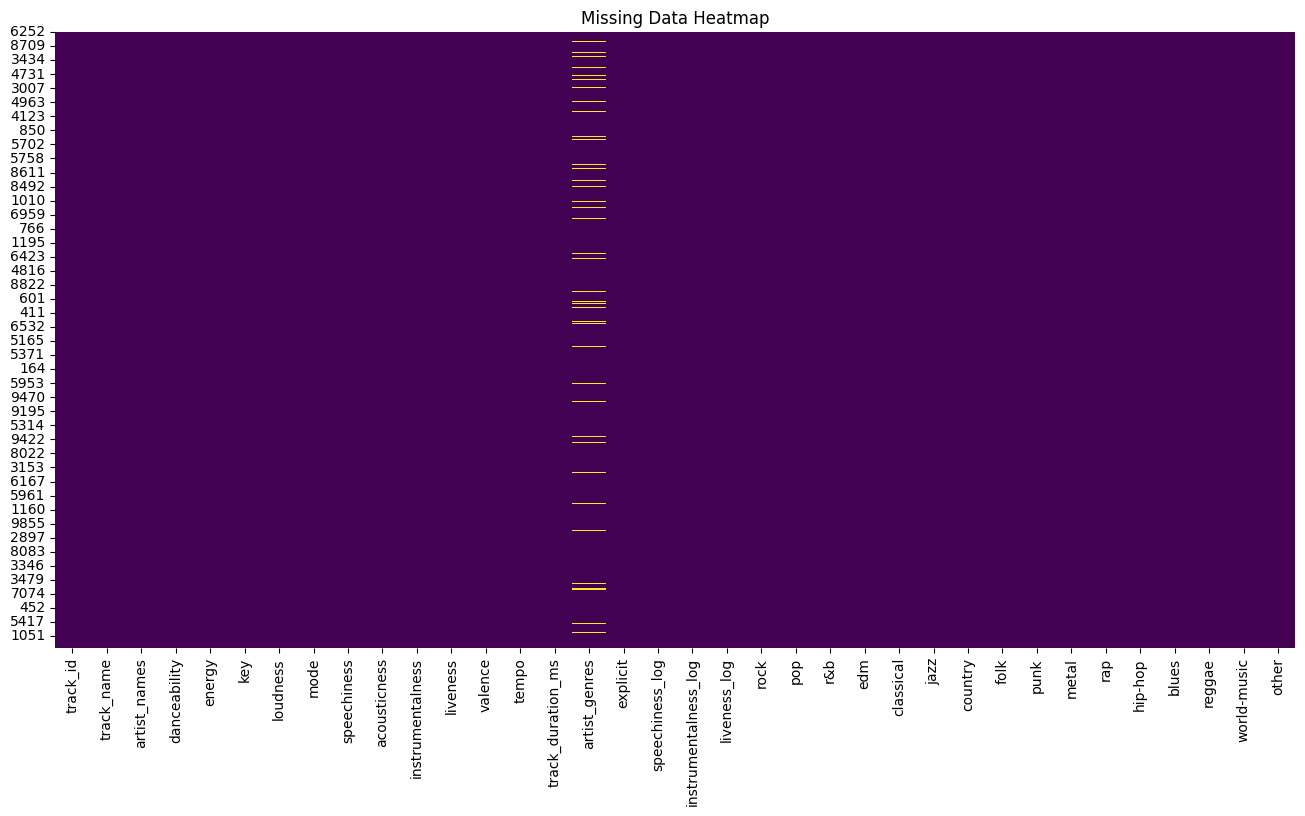

In [39]:
# Create a heatmap of missing values
plt.figure(figsize=(16,8))
sns.heatmap(df_sample.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

## Drop rows missing genre data

In [40]:
# Drop rows where artist_genres is missing
df_sample = df_sample.dropna(subset=['artist_genres'])

In [41]:
df_sample = df_sample[['track_id', 'track_name', 'artist_names', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'acousticness', 'valence', 'tempo', 'track_duration_ms',
       'artist_genres', 'explicit', 'speechiness_log', 'instrumentalness_log',
       'liveness_log', 'rock', 'pop', 'r&b', 'edm', 'classical', 'jazz',
       'country', 'folk', 'punk', 'metal', 'rap', 'hip-hop', 'blues', 'reggae',
       'world-music', 'other']]

## Visualize
Now that we have df_sample we can use some visualizations to understand it

In [42]:
df_sample.columns

Index(['track_id', 'track_name', 'artist_names', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'acousticness', 'valence', 'tempo',
       'track_duration_ms', 'artist_genres', 'explicit', 'speechiness_log',
       'instrumentalness_log', 'liveness_log', 'rock', 'pop', 'r&b', 'edm',
       'classical', 'jazz', 'country', 'folk', 'punk', 'metal', 'rap',
       'hip-hop', 'blues', 'reggae', 'world-music', 'other'],
      dtype='object')

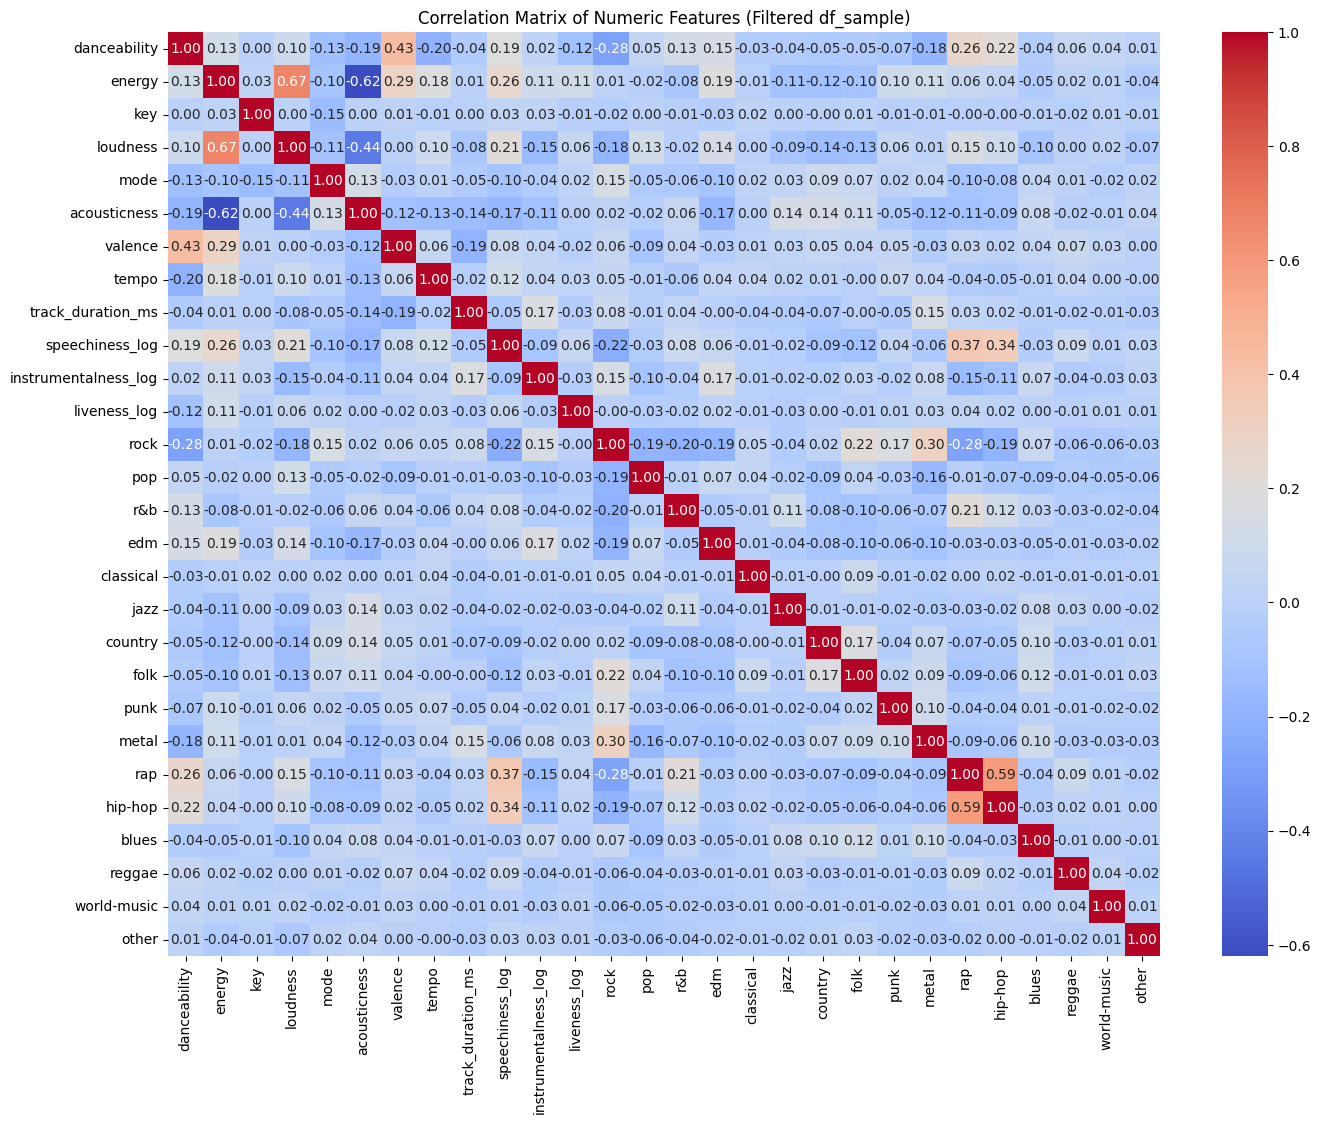

In [43]:
# Select numeric columns only
numeric_cols = df_sample.select_dtypes(include=['number']).columns

# Compute correlation matrix
corr_matrix = df_sample[numeric_cols].corr()

# Display heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Features (Filtered df_sample)")
plt.show()

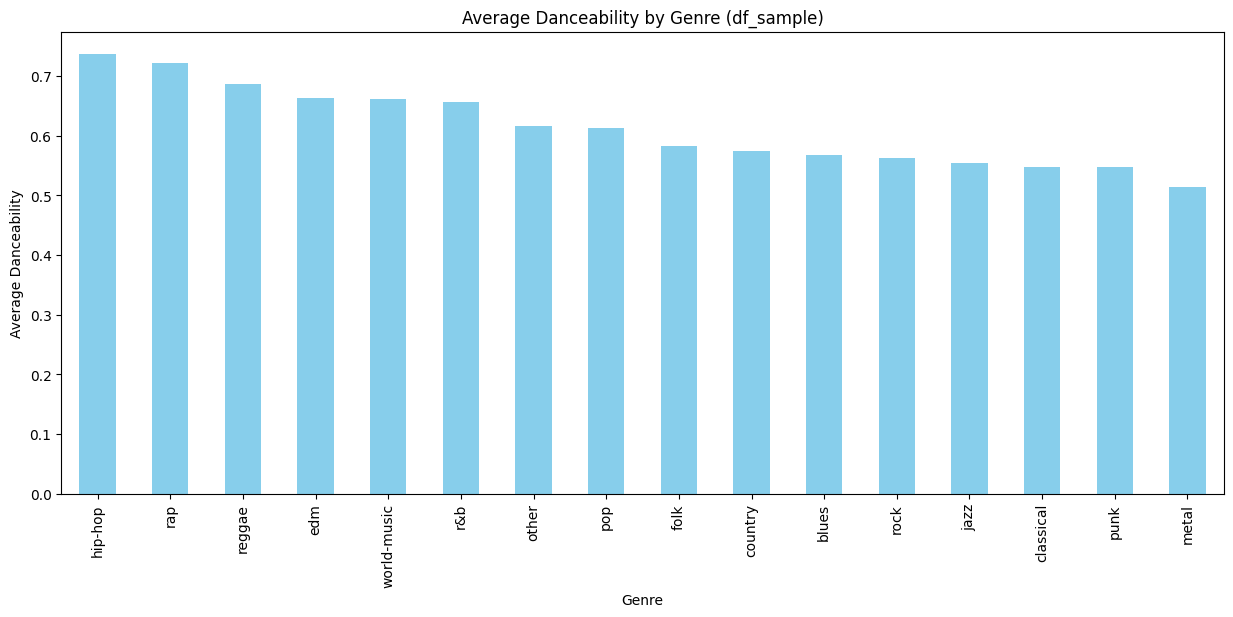

In [20]:
# List of genre dummy columns
genre_cols = [
    'rock', 'pop', 'r&b', 'edm', 'classical', 'jazz', 'country',
    'folk', 'punk', 'metal', 'rap', 'hip-hop', 'blues', 'reggae',
    'world-music', 'other'
]

# Compute mean danceability per genre
genre_means = {}
for genre in genre_cols:
    # Only consider rows where the genre = 1
    genre_means[genre] = df_sample.loc[df_sample[genre] == 1, 'danceability'].mean()

# Convert to a DataFrame for sorting and plotting
genre_means = pd.DataFrame.from_dict(genre_means, orient='index', columns=['danceability'])
genre_means = genre_means.sort_values('danceability', ascending=False)

# Plot
genre_means.plot(kind='bar', figsize=(15,6), legend=False, color='skyblue')
plt.title('Average Danceability by Genre (df_sample)')
plt.ylabel('Average Danceability')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show()

C:\Users\benja\AppData\Local\Temp\ipykernel_29016\2274061343.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='genre', y='tempo', palette='coolwarm')


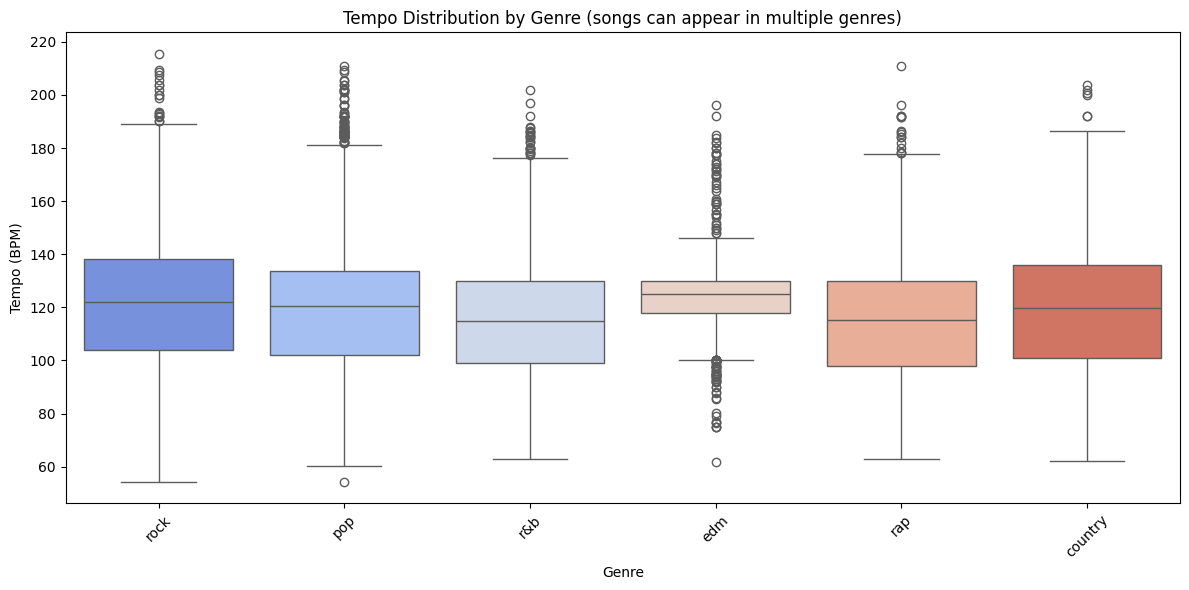

In [21]:
# Assume numeric_cols already defined
genre_cols = ['rock', 'pop', 'r&b', 'edm', 'rap', 'country']  # all genre one-hot columns

# Melt the one-hot columns into long format
df_long = df_sample.melt(
    id_vars=['tempo'],       # keep tempo
    value_vars=genre_cols,   # the one-hot genre columns
    var_name='genre',
    value_name='is_genre'
)

# Keep only rows where the song has that genre
df_long = df_long[df_long['is_genre'] == 1]

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_long, x='genre', y='tempo', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Tempo Distribution by Genre (songs can appear in multiple genres)")
plt.xlabel("Genre")
plt.ylabel("Tempo (BPM)")
plt.tight_layout()
plt.show()

## Turn 'explicit' into a 0/1 column

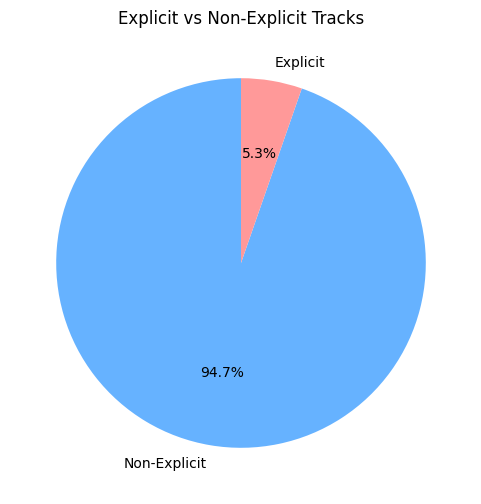

In [100]:
# If explicit is boolean True/False
df_sample['explicit'] = df_sample['explicit'].astype(int)

explicit_counts = df_sample['explicit'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    explicit_counts, 
    labels=['Non-Explicit', 'Explicit'],  # 0 -> Non-Explicit, 1 -> Explicit
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66B2FF','#FF9999']
)
plt.title("Explicit vs Non-Explicit Tracks")
plt.show()

The only potential issue with this dataset is that the genres for pop and rock dominate the other main genres. This makes sense considering it is a dataset for top billboard songs, but just something to consider in the future.

## Finally, drop / reformat the last few columns, and save as a clean df_sample

In [45]:
df_sample = df_sample.drop(columns=['track_name', 'artist_names', 'artist_genres'])

In [104]:
# Rename problematic columns to avoid special characters
df_sample = df_sample.rename(columns={
    'r&b': 'rnb',
    'hip-hop': 'hiphop',
    'world-music': 'world_music'
})

In [ ]:
# Save df_sample
df_sample.to_csv('spotify_sample_cleaned.csv', index=False)

# (2) Assumptions

## Validity

The cleaned dataset appears valid for the goal of predicting danceability. All available key predictors (energy, key, loudness, mode, acousticness, valence, tempo, track duration, speechiness, instrumentalness, liveness, and genre) are present, and missing values have been addressed by removal. Scatterplots and correlation checks (below) confirm that predictors have meaningful relationships with the outcome of danceability. I don't think there are any obvious missing variables that would change the model. Data generated after the most recent update of this dataset (October 2024) is not included. We took a random sample of 5000 from the dataset of 10000 observations for the sake of reducing model runtime. The genre columns are derived from the artist genre.

There are variables, like album name, song name, song genre, and song popularity, that we do not have included in the sample dataset. Album name and song name would be so granular that we would have thousands of dimensions. Unfortunately, we don't have data on song genre. Lastly, popularity was a variable we dropped in order to keep bias out of the dataset. At the time the Spotify API is scraped, the popularity scores reflect current popularity. So, the dataset sample popularity reflects song popularity at the time of October 2024.

## Representativeness

The data was collected from Spotify's API of the top 10,000 songs between 1950 and October 2024. It is representative of Spotify user listening data, or the general public's music listening behavior.

We dropped a few observations that were missing the artist genre field at random.

In [106]:
df_sample.columns

Index(['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'acousticness', 'valence', 'tempo', 'track_duration_ms', 'explicit',
       'speechiness_log', 'instrumentalness_log', 'liveness_log', 'rock',
       'pop', 'rnb', 'edm', 'classical', 'jazz', 'country', 'folk', 'punk',
       'metal', 'rap', 'hiphop', 'blues', 'reggae', 'world_music', 'other',
       'dffits', 'residuals', 'fittedvalues'],
      dtype='object')

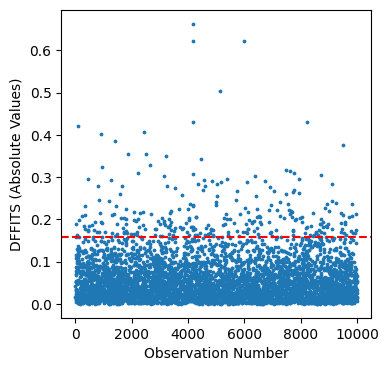

In [108]:
import statsmodels.formula.api as smf

fit = smf.ols(
    'danceability ~ energy + key + loudness + mode + acousticness + valence + '
    'tempo + track_duration_ms + explicit + speechiness_log + instrumentalness_log + '
    'liveness_log + rock + pop + rnb + edm + classical + jazz + country + '
    'folk + punk + metal + rap + hiphop + blues + reggae + world_music + other',
    data=df_sample
).fit()

# Dropping missing rows
df_sample = df_sample.dropna(subset=[
    'danceability','energy','key','loudness','mode','acousticness',
    'valence','tempo','track_duration_ms','explicit','speechiness_log',
    'instrumentalness_log','liveness_log','rock','pop','rnb','edm','classical',
    'jazz','country','folk','punk','metal','rap','hiphop','blues','reggae',
    'world_music','other'
])

# Define the formula string explicitly
formula = (
    'danceability ~ energy + key + loudness + mode + acousticness + valence + '
    'tempo + track_duration_ms + explicit + speechiness_log + instrumentalness_log + '
    'liveness_log + rock + pop + rnb + edm + classical + jazz + country + '
    'folk + punk + metal + rap + hiphop + blues + reggae + world_music + other'
)

# Fit the model on the cleaned data
fit = smf.ols(formula, data=df_sample).fit()

# Compute DFFITS
df_sample['dffits'] = fit.get_influence().dffits[0]

# Plot absolute DFFITS vs. observation number
threshold = 2 * np.sqrt(len(fit.params) / len(df_sample))  # For n > 30
plt.figure(figsize=(4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(df_sample.index, np.abs(df_sample['dffits']), s=3)
plt.axhline(y=threshold, color='r', linestyle='dashed')
plt.show()

The DFFITS plot illustrates the absolute influence of each observation on the regression model's fitted values for predicting song danceability based on audio features and genre indicators. DFFITS quantifies how much the model's predictions would change if a specific observation were removed. So, a high absolute value signals and influential point (potential outlier or high-leverage observation) that disproportionately impacts the overall fit.

A small number of points exceed the threshold, with values ranging up to ~0.6. They appear sporadic, but overall the model seems reasonably stable. To investigate further, let's focus on extracting and examining these high outlier points where abs(dffits) > threshold, sorting descending by DFFITS.

### Investigate influential points

In [109]:
outliers_dffits = df_sample[np.abs(df_sample['dffits']) > 2 * np.sqrt(len(fit.params) / len(df_sample))]
outliers_dffits_sorted = outliers_dffits.sort_values(by = 'dffits', ascending = False)
outliers_dffits_sorted.head()

track_id  danceability  energy  key  \
5146  spotify:track:794O0j1i57zgUMC7BCBMqY         0.821   0.707  1.0   
8209  spotify:track:6LnjelBSl5xYpdfhfFTJbX         0.846   0.721  2.0   
1411  spotify:track:19cxRMqCzpYNU4wXcMj8jA         0.929   0.301  6.0   
9496  spotify:track:32z32gEn14FHJJ2lZP4xLS         0.830   0.228  1.0   
1882  spotify:track:3zBhihYUHBmGd2bcQIobrF         0.768   0.367  2.0   

      loudness  mode  acousticness  valence    tempo  track_duration_ms  \
5146   -17.299   1.0         0.488   0.2260  107.030             134066   
8209    -5.248   1.0         0.163   0.6380  121.417             203253   
1411   -10.877   0.0         0.804   0.6180  119.963             176386   
9496   -14.219   1.0         0.627   0.0613  107.862             185213   
1882   -11.226   1.0         0.683   0.5320  103.621             163755   

      explicit  speechiness_log  instrumentalness_log  liveness_log  rock  \
5146         0        -1.309330            -13.815511     -0.621757     0   
8209         0        -3.007785            -13.815511     -1.639897     1   
1411         0        -2.905873            -13.815511     -2.448768     0   
9496         0        -2.535766             -6.270649     -1.890475     0   
1882         0        -3.457736            -10.876349     -2.513306     0   

      pop  rnb  edm  classical  jazz  country  folk  punk  metal  rap  hiphop  \
5146    0    0    0          0     0        0     0     0      0    0       0   
8209    1    0    0          0     0        1     1     0      1    0       0   
1411    0    0    0          0     0        0     0     0      0    0       0   
9496    0    0    0          0     0        0     0     0      0    0       0   
1882    0    1    0          0     1        0     0     0      0    0       0   

      blues  reggae  world_music  other    dffits  residuals  fittedvalues  
5146      0       0            0      1  0.503390   0.372241      0.448759  
8209      1       0            0      0  0.430880   0.319876      0.526124  
1411      0       1            0      0  0.385713   0.304641      0.624359  
9496      0       0            0      1  0.375004   0.347772      0.482228  
1882      1       0            0      0  0.355319   0.223942      0.544058

Should we remove suspicious points?. High DFFITS points aren't necessarily "bad" -- they might just be unusual or extreme. Consider data entry errors (e.g. songs that have 6 very different genres associated with them). Or, keep suspicious observations and then report sensitivity and run the model without changing them. DFFITS is a diagnostic tool.

## Additivity/Linearity

### Plotting predictors

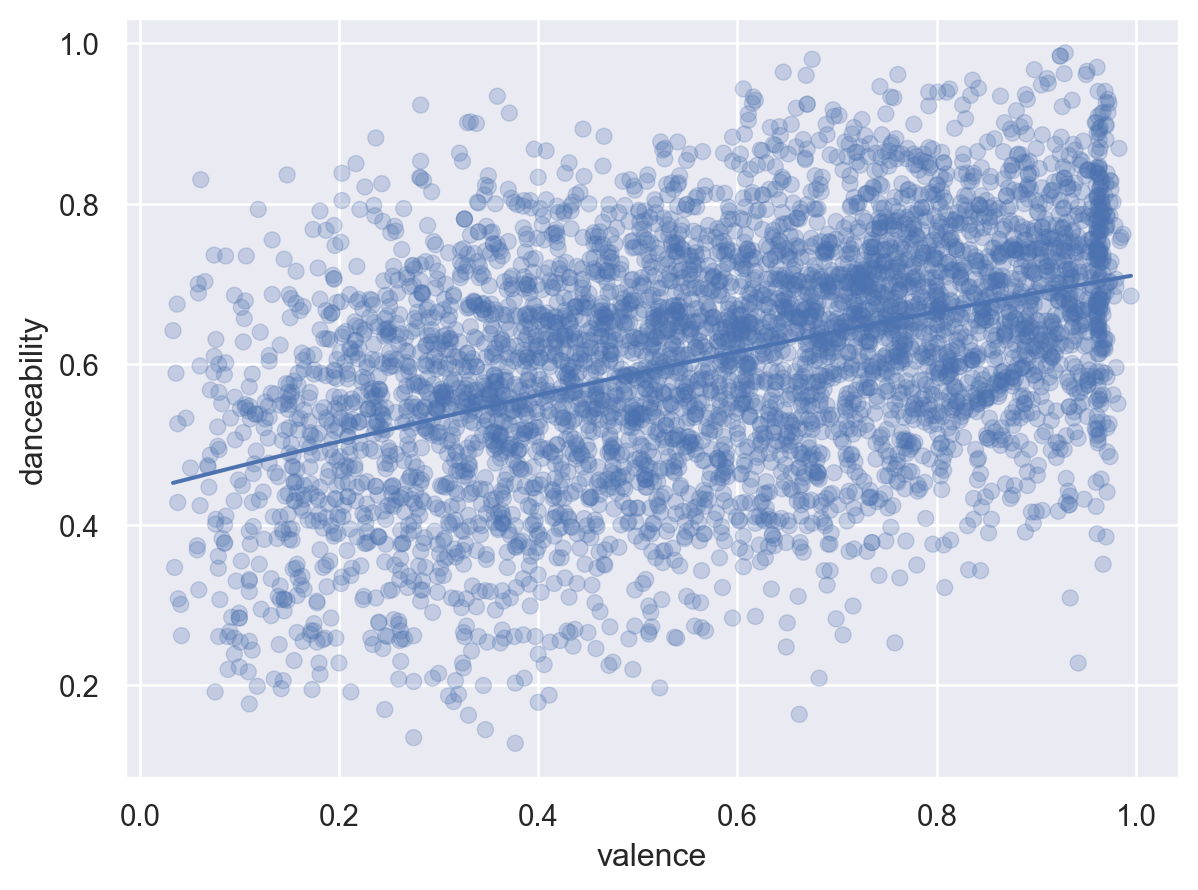

In [110]:
import seaborn.objects as so

# Save the residuals and fitted values
df_sample['residuals'] = fit.resid
df_sample['fittedvalues'] = fit.fittedvalues

(so.Plot(df, x = 'valence', y = 'danceability')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

Plotting a predictor (valence, in this example) against the outcome (danceability), the points should generally follow a straight line trend, or at least form a random "cloud" of points scattered evenly around that line without any clear systematic patterns that suggest nonlinearity.

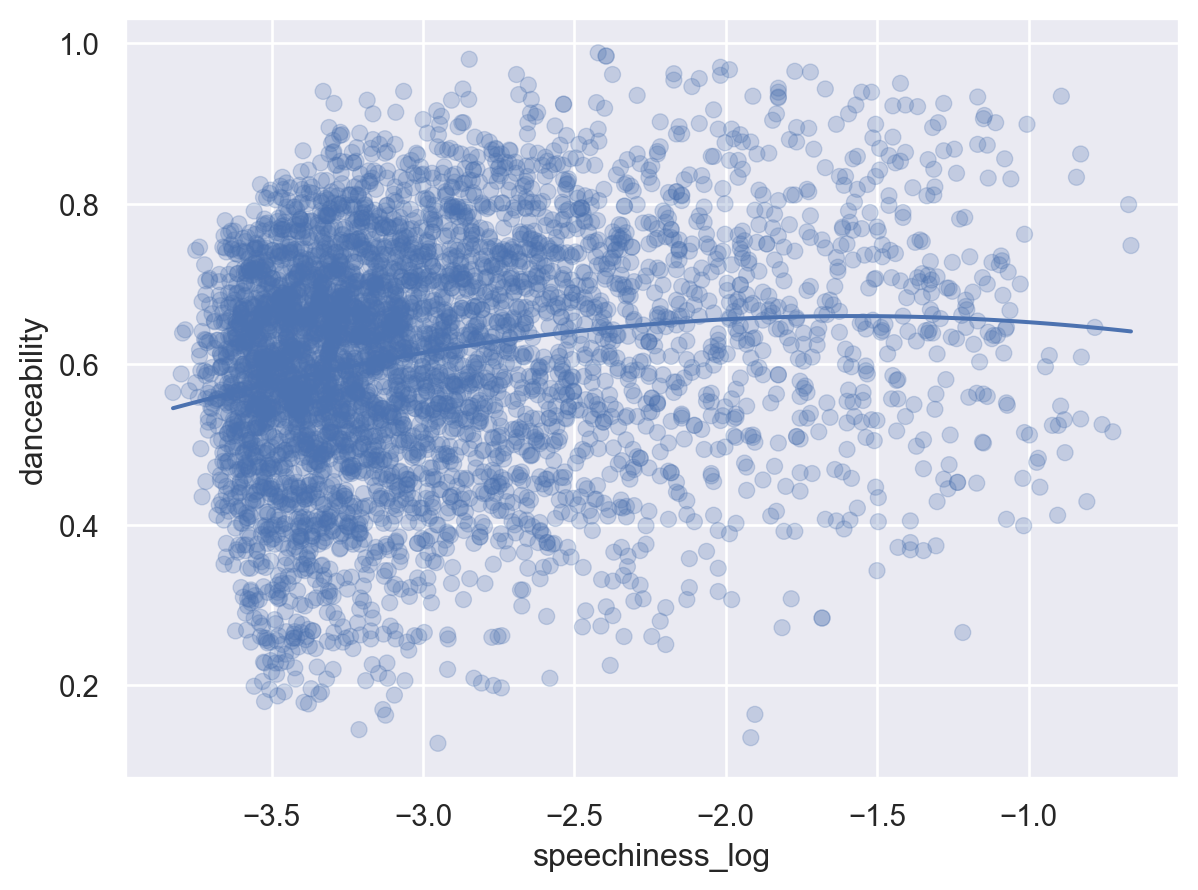

In [111]:
(so.Plot(df_sample, x = 'speechiness_log', y = 'danceability')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

The spread of points widens as speechiness_log increases, which might hint at heteroscedasticity (non-constant variance) rather than nonlinearity.

### Plotting residuals

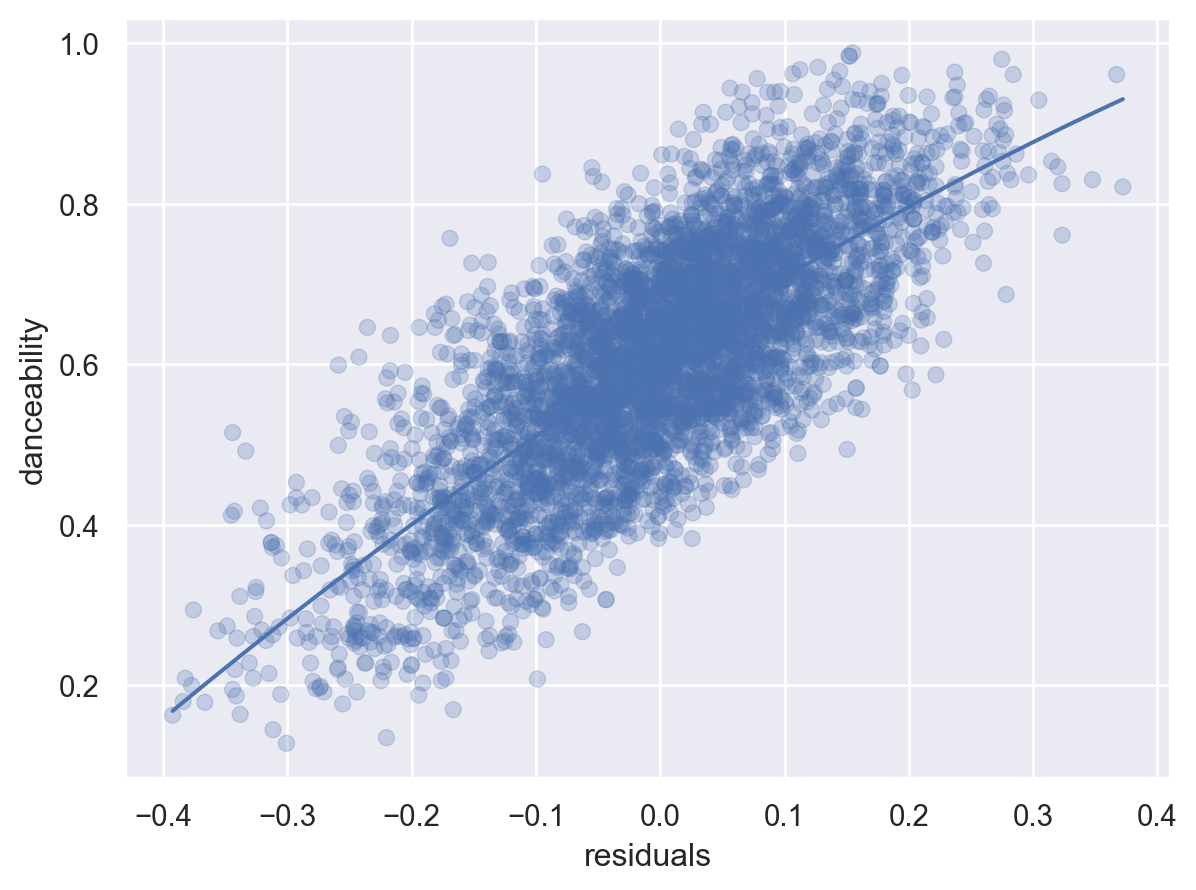

In [112]:
(so.Plot(df_sample, x = 'residuals', y = 'danceability')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

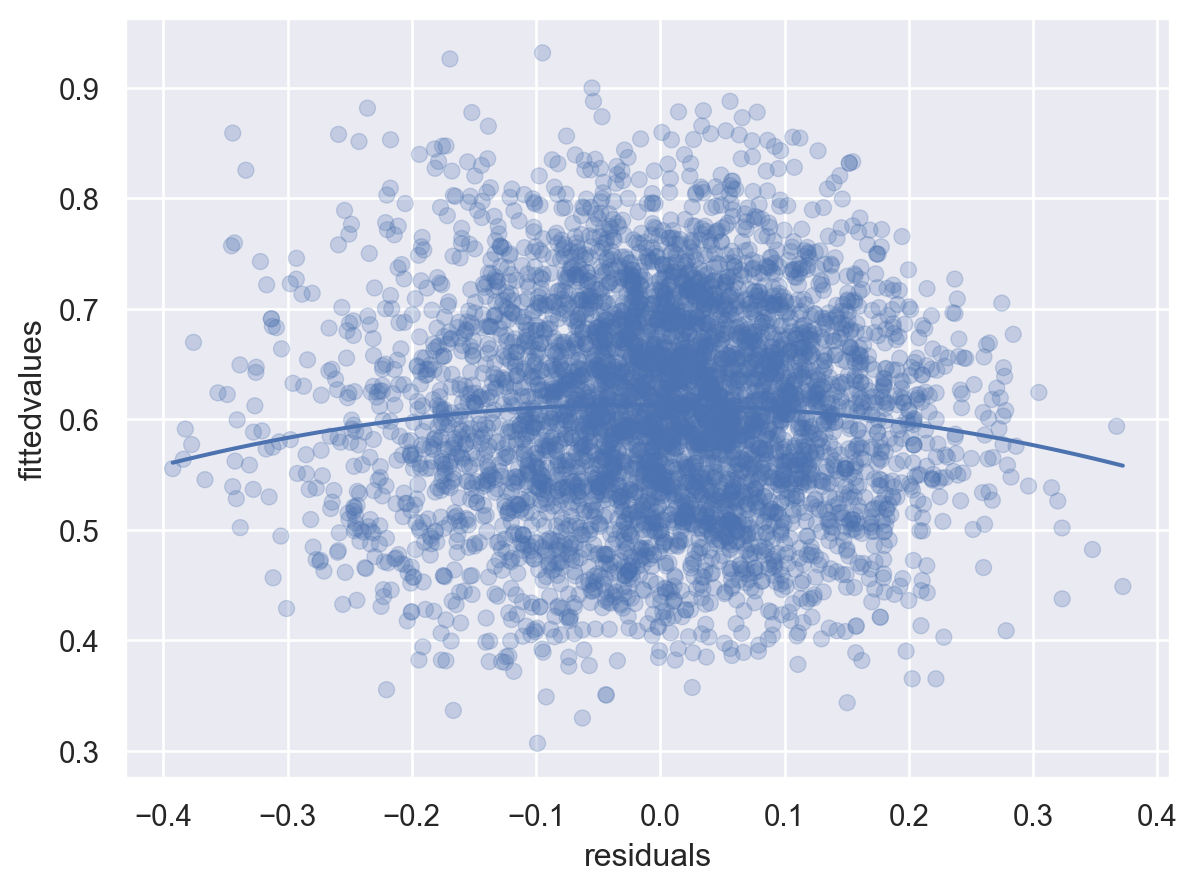

In [113]:
(so.Plot(df_sample, x = 'residuals', y = 'fittedvalues')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

The relationship between our residuals and y is roughly linear with a positive slope, and the points form a dense cloud around the line without any obvious non-linear patterns like curves. 

### Partial regression plots

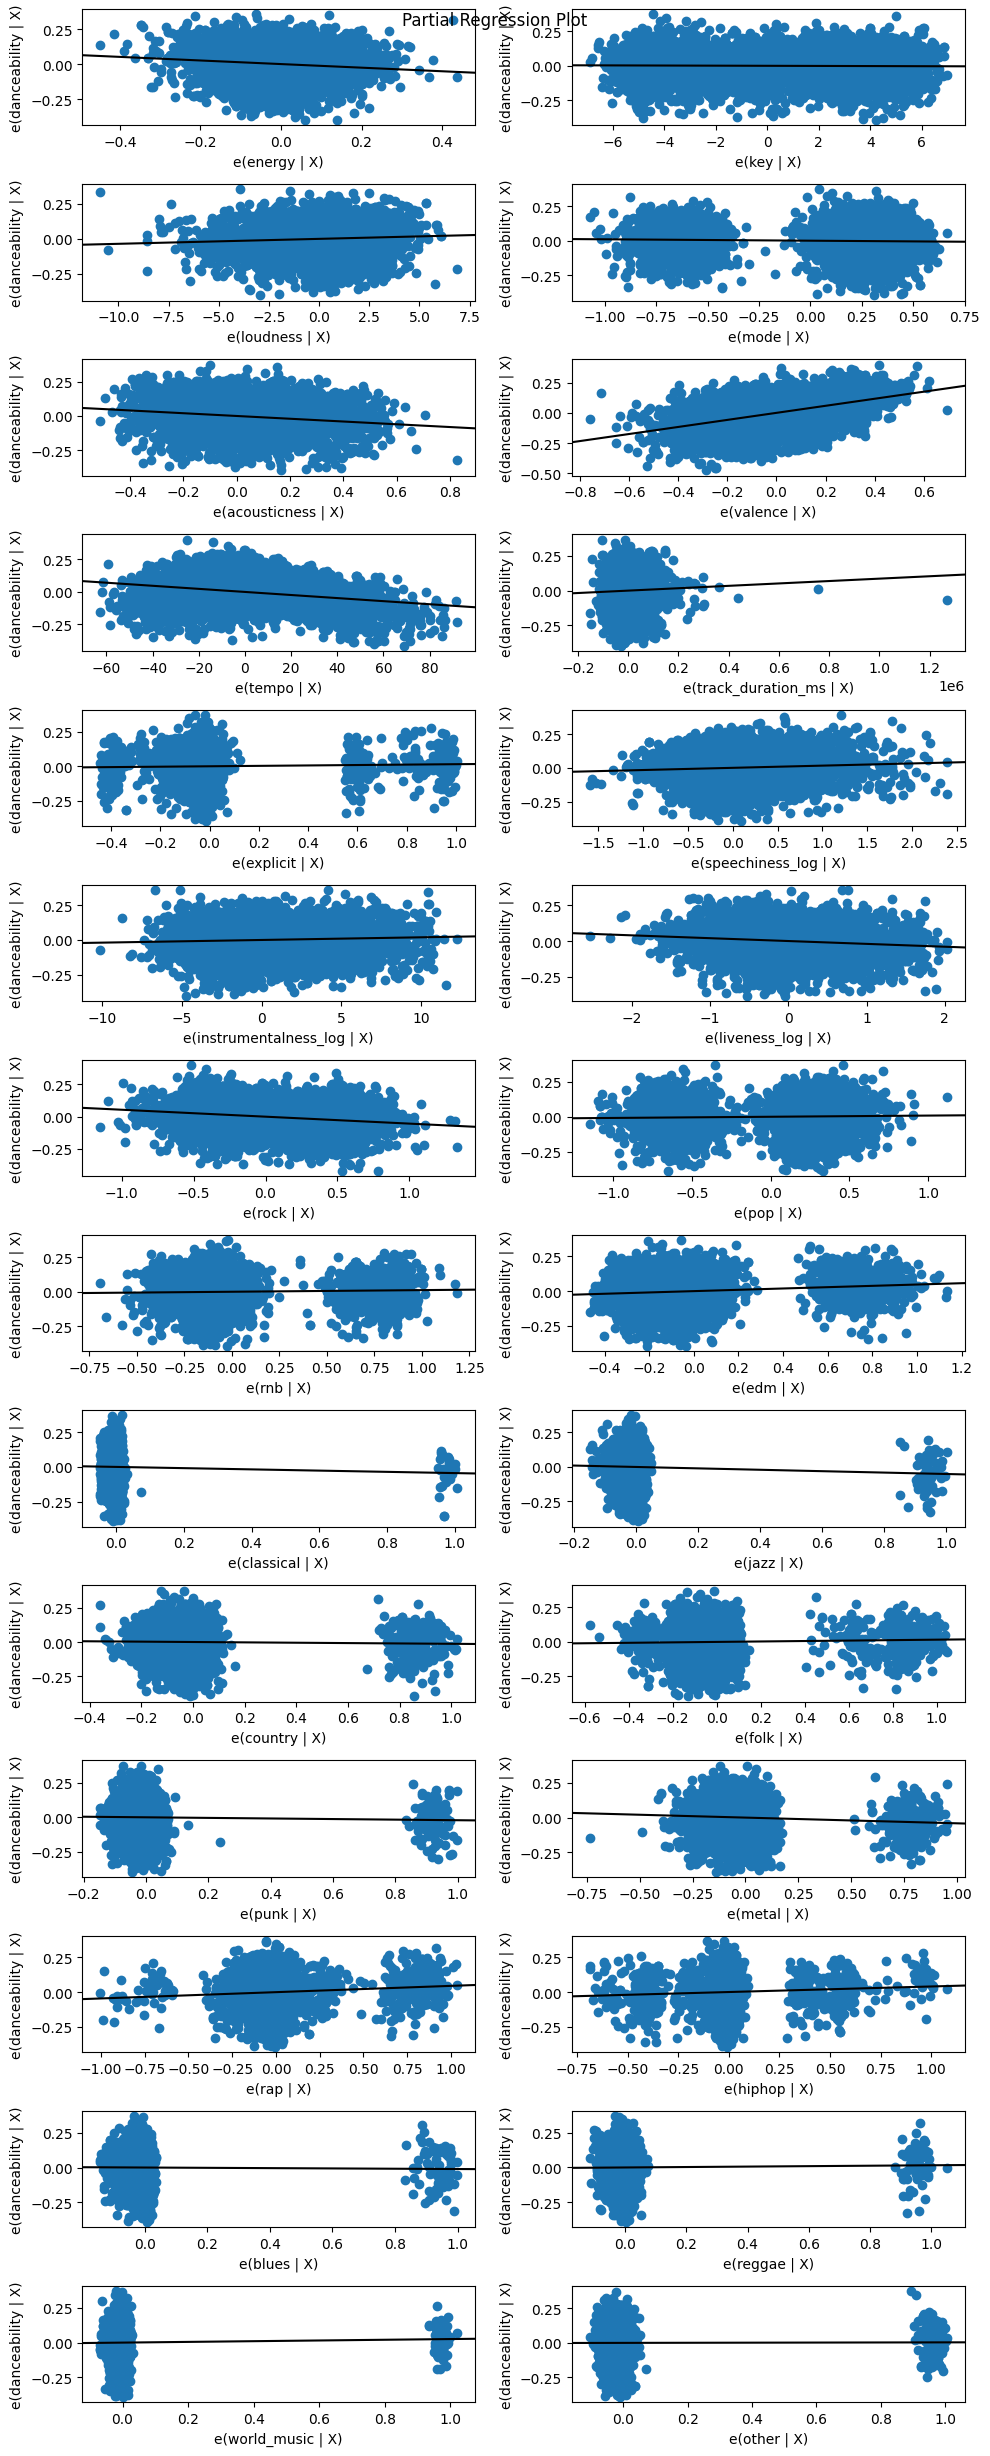

In [121]:
# Corrected predictors list
predictors = [
    'energy', 'key', 'loudness', 'mode', 'acousticness', 'valence', 'tempo', 
    'track_duration_ms', 'explicit', 'speechiness_log', 'instrumentalness_log', 
    'liveness_log', 'rock', 'pop', 'rnb', 'edm', 'classical', 'jazz', 'country', 
    'folk', 'punk', 'metal', 'rap', 'hiphop', 'blues', 'reggae', 'world_music', 'other'
]

fig = plt.figure(figsize = (10,25))
sm.graphics.plot_partregress_grid(
  fit, 
  exog_idx = list(predictors), 
  fig = fig
)
fig.tight_layout()
plt.show()

The partial regression plots look roughly linear and cloud-like.

## Independence

The data is a random sample of n = 5000 from our larger dataset. Each observation is unique. Observations should be independent of each other and identically distributed (coming from the same process of gathering data).

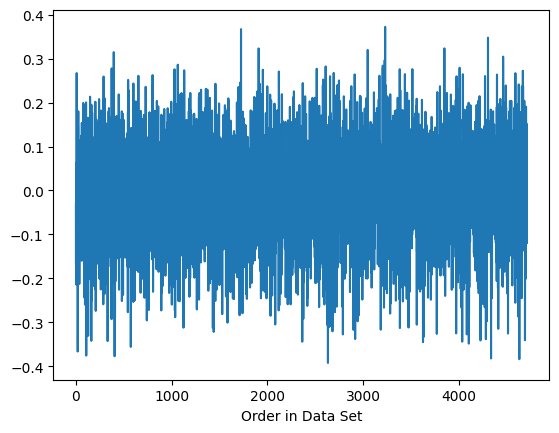

In [123]:
x_values = range(1, len(df_sample) + 1)
plt.plot(x_values, df_sample['residuals'], linestyle='-')
plt.xlabel("Order in Data Set")
plt.show()

There doesn't appear to be a trend in the sequential plot.

## Constant Variance

Constant variance is diagnosable with a scatterplot of residuals and fitted values.

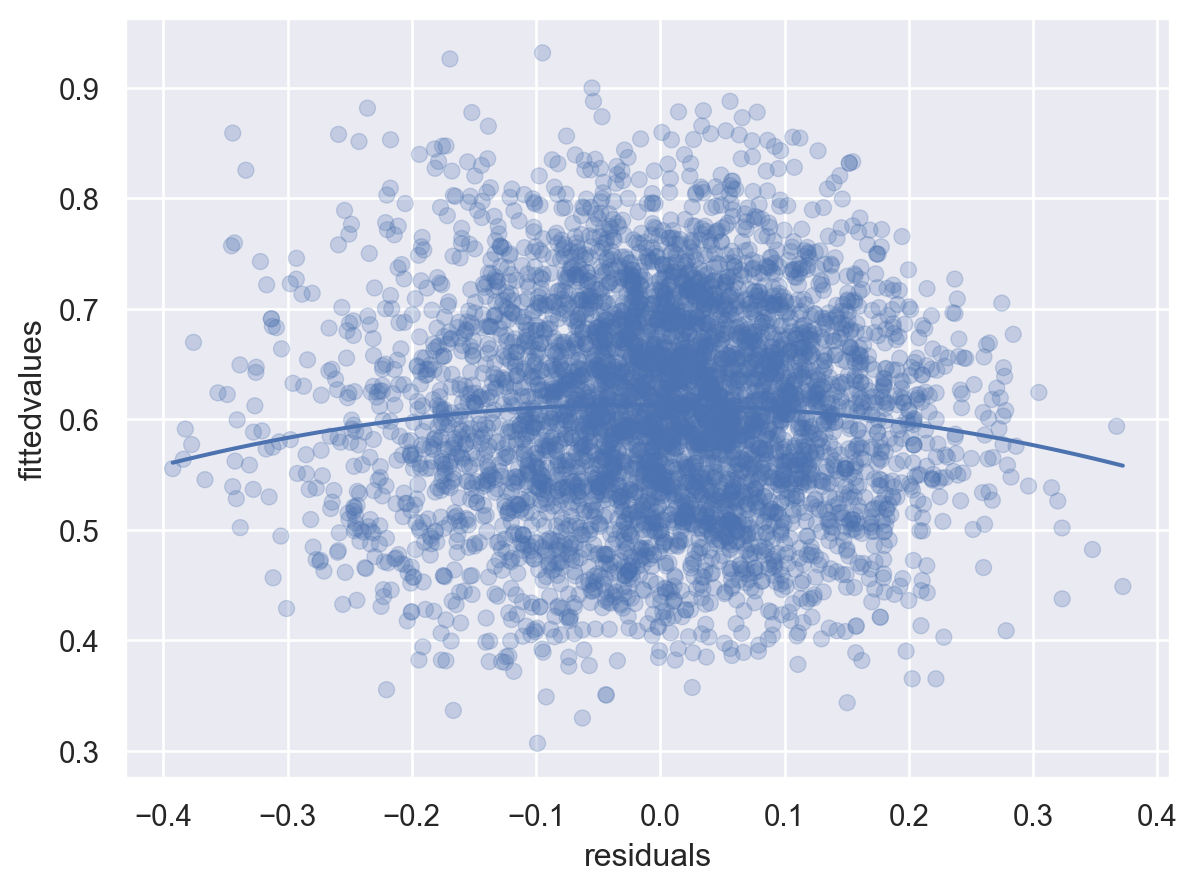

In [124]:
(so.Plot(df_sample, x = 'residuals', y = 'fittedvalues')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

If there is constant variance (homoscedasticity), we should see constant variance in the residuals (no funnel shape). We have a cloud-like shape and a roughly linear line, so our variance is constant.

## Normality

This assumption is that the variation, or error, is normally distributed. We can plot the residuals and use a Q-Q plot to diagnose error normality. A histogram should show that the residuals are roughly normal, and a Q-Q plot should show that the model's residuals follow a roughly diagonal line.

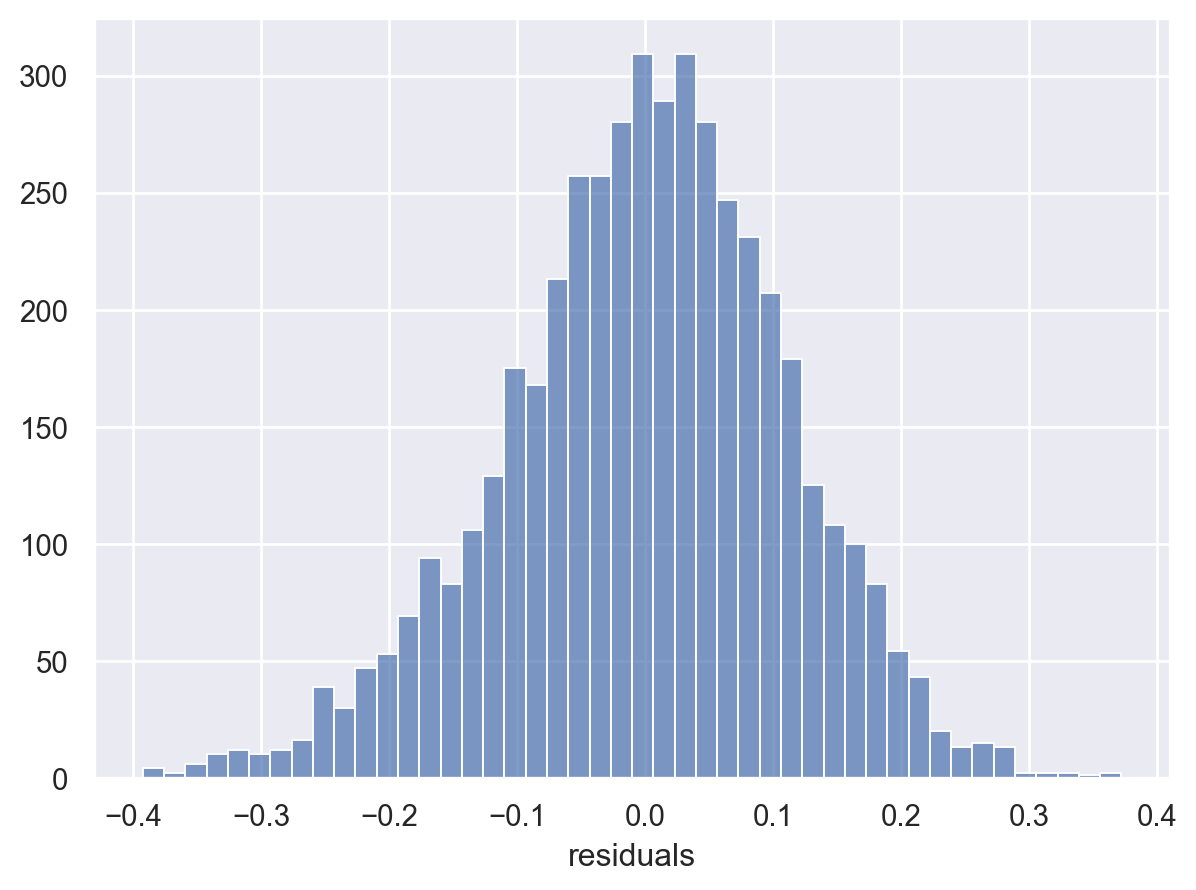

In [125]:
(so.Plot(df_sample, x = 'residuals')
  .add(so.Bars(), so.Hist())
)

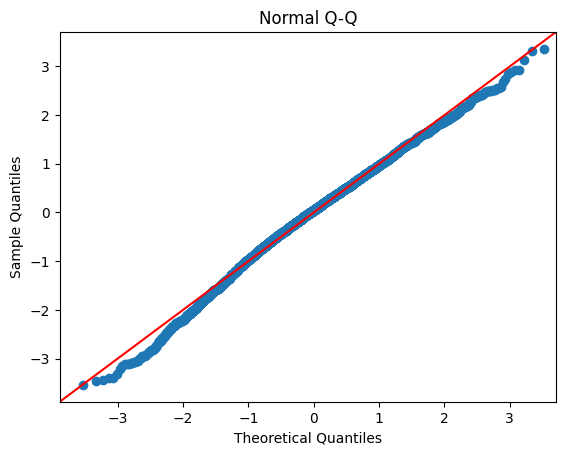

In [126]:
sm.qqplot(
  df_sample['residuals'], 
  line = '45', 
  fit = True
)
plt.title("Normal Q-Q")
plt.show()

The quantile-quantile plot shows that the variation or error is roughly normally distributed.

## Identifiability / Multicollinearity

We want to avoid using multiple predictors that have high multicollinearity because it creates a problem for model interpretability - making it difficult to disentangle the individual effects of highly correlated predictors.

We can use Variance Inflation Factor (VIF) as an indicator of problematic variables.

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import polars as pl

X_train = df_sample[predictors]  # Simplified selection (no need for Polars round-trip)

vif = np.zeros(len(X_train.columns))
for i in range(len(X_train.columns)):
    vif[i] = variance_inflation_factor(X_train.values, i)  # Use .values to avoid index issues

vif_df = pl.DataFrame({
    'predictors': predictors,
    'vif': vif
})

with pl.Config(tbl_rows=30):
    print(vif_df)

shape: (28, 2)
┌──────────────────────┬───────────┐
│ predictors           ┆ vif       │
│ ---                  ┆ ---       │
│ str                  ┆ f64       │
╞══════════════════════╪═══════════╡
│ energy               ┆ 27.771744 │
│ key                  ┆ 3.197915  │
│ loudness             ┆ 11.140206 │
│ mode                 ┆ 3.568098  │
│ acousticness         ┆ 2.690523  │
│ valence              ┆ 9.060841  │
│ tempo                ┆ 20.872545 │
│ track_duration_ms    ┆ 18.233404 │
│ explicit             ┆ 1.256801  │
│ speechiness_log      ┆ 25.224472 │
│ instrumentalness_log ┆ 7.777899  │
│ liveness_log         ┆ 8.409873  │
│ rock                 ┆ 2.649957  │
│ pop                  ┆ 3.787744  │
│ rnb                  ┆ 1.30688   │
│ edm                  ┆ 1.333219  │
│ classical            ┆ 1.025803  │
│ jazz                 ┆ 1.063466  │
│ country              ┆ 1.155819  │
│ folk                 ┆ 1.230321  │
│ punk                 ┆ 1.087739  │
│ metal                

The key metrics that stand out as being significantly high are energy, speechiness_log, tempo, track_duration_ms, and loudness.

Based on the correlation matrix we observed earlier, we can see energy and loudness are strongly correlated (0.67). Acousticness and energy are negatively correlated (-0.62). Valence and danceability are negatively correlated (-0.43). And acousticness and loudness are negatively correlated (-0.44).

We'll drop energy, and also combine rap and hiphop into rap_hiphop and see the new VIFs.

In [137]:
# Combine rap and hiphop into a new binary variable (1 if either is 1)
df_sample['rap_hiphop'] = ((df_sample['rap'] == 1) | (df_sample['hiphop'] == 1)).astype(int)

# Updated predictors list for VIF (matches the new formula, excluding intercept)
predictors = [
    'key', 'loudness', 'mode', 'acousticness', 'valence', 'tempo',
    'track_duration_ms', 'explicit', 'speechiness_log', 'instrumentalness_log',
    'liveness_log', 'rock', 'pop', 'rnb', 'edm', 'classical', 'jazz', 'country',
    'folk', 'punk', 'metal', 'rap_hiphop', 'blues', 'reggae', 'world_music', 'other'
]

X_train = df_sample[predictors]  # Simplified selection (no need for Polars round-trip)

vif = np.zeros(len(X_train.columns))
for i in range(len(X_train.columns)):
    vif[i] = variance_inflation_factor(X_train.values, i)  # Use .values to avoid index issues

vif_df = pl.DataFrame({
    'predictors': predictors,
    'vif': vif
})

with pl.Config(tbl_rows=30):
    print(vif_df)

shape: (26, 2)
┌──────────────────────┬───────────┐
│ predictors           ┆ vif       │
│ ---                  ┆ ---       │
│ str                  ┆ f64       │
╞══════════════════════╪═══════════╡
│ key                  ┆ 3.128189  │
│ loudness             ┆ 8.686179  │
│ mode                 ┆ 3.530218  │
│ acousticness         ┆ 2.476567  │
│ valence              ┆ 6.823965  │
│ tempo                ┆ 17.307936 │
│ track_duration_ms    ┆ 16.081028 │
│ explicit             ┆ 1.216566  │
│ speechiness_log      ┆ 23.727246 │
│ instrumentalness_log ┆ 7.705084  │
│ liveness_log         ┆ 8.399437  │
│ rock                 ┆ 2.634684  │
│ pop                  ┆ 3.762073  │
│ rnb                  ┆ 1.302365  │
│ edm                  ┆ 1.282332  │
│ classical            ┆ 1.024409  │
│ jazz                 ┆ 1.061867  │
│ country              ┆ 1.155111  │
│ folk                 ┆ 1.22541   │
│ punk                 ┆ 1.084799  │
│ metal                ┆ 1.28019   │
│ rap_hiphop           

The updated VIF table after dropping energy and combining rap/hiphop shows some improvements, but multicollinearity remains problematic for speechiness_log, track_duration_ms, and tempo. Others like liveness_log, instrumentalness_log, loudness, and valence are also a bit higher than 1 but closer to acceptable (<10).

Let's create another correlation matrix with the problematic fields and a few others as references.

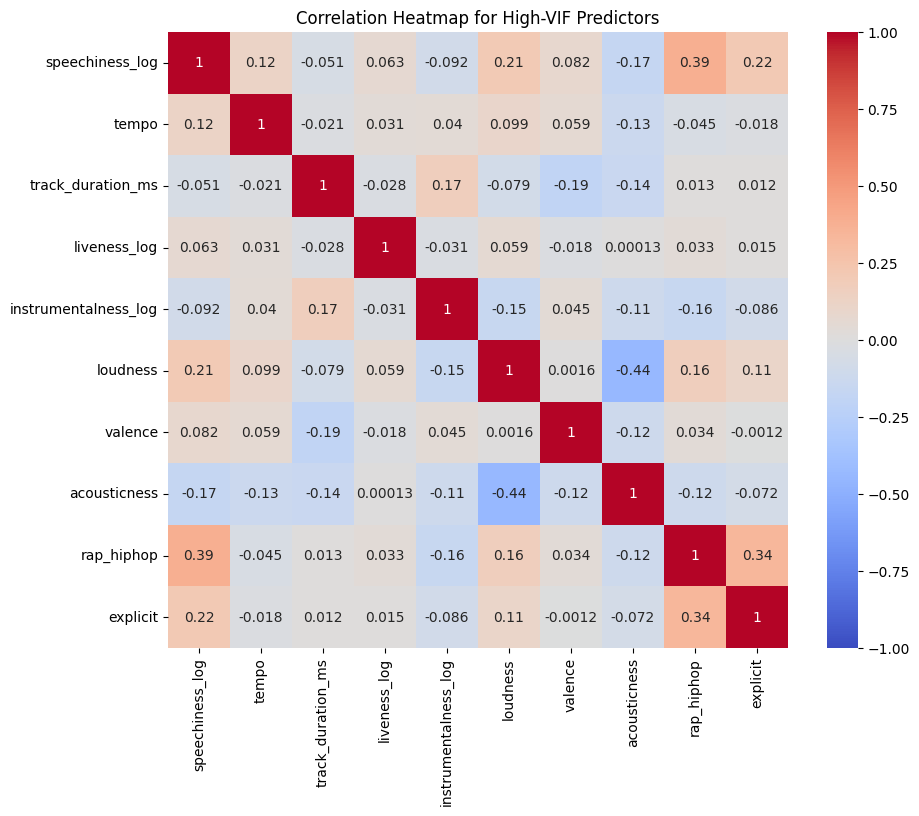

In [139]:
# Select high-VIF suspects and a few others for context
high_vif_vars = [
    'speechiness_log', 'tempo', 'track_duration_ms', 'liveness_log', 
    'instrumentalness_log', 'loudness', 'valence', 'acousticness', 
    'rap_hiphop', 'explicit'
]
corr_matrix = df_sample[high_vif_vars].corr()

# Display heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for High-VIF Predictors')
plt.show()

The heatmap doesn't reveal obvious priorities. The next highest correlation is between rap_hiphop and speechiness_log, which makes intuitive sense. We'll drop speechiness_log and see how that affects the rest of our VIFs.

After dropping just speechiness_log, the outcome was still a VIF of 14+ for track_duration_ms and 16+ for tempo. We'll remove track_duration_ms and tempo and see what the outcome is.

In [180]:
# Updated predictors list for VIF (drop speechiness_log and track_duration_ms)
predictors = [
    'key', 'loudness', 'mode', 'acousticness', 'valence',
    'explicit', 'instrumentalness_log',
    'liveness_log', 'rock', 'pop', 'rnb', 'edm', 'classical', 'jazz', 'country',
    'folk', 'punk', 'metal', 'rap_hiphop', 'blues', 'reggae', 'world_music', 'other'
]

X_train = df_sample[predictors]  # Simplified selection (no need for Polars round-trip)

vif = np.zeros(len(X_train.columns))
for i in range(len(X_train.columns)):
    vif[i] = variance_inflation_factor(X_train.values, i)  # Use .values to avoid index issues

vif_df = pl.DataFrame({
    'predictors': predictors,
    'vif': vif
})

with pl.Config(tbl_rows=30):
    print(vif_df)

shape: (23, 2)
┌──────────────────────┬──────────┐
│ predictors           ┆ vif      │
│ ---                  ┆ ---      │
│ str                  ┆ f64      │
╞══════════════════════╪══════════╡
│ key                  ┆ 2.973298 │
│ loudness             ┆ 7.274944 │
│ mode                 ┆ 3.361263 │
│ acousticness         ┆ 2.382068 │
│ valence              ┆ 6.092538 │
│ explicit             ┆ 1.210581 │
│ instrumentalness_log ┆ 6.608862 │
│ liveness_log         ┆ 7.279648 │
│ rock                 ┆ 2.512129 │
│ pop                  ┆ 3.439737 │
│ rnb                  ┆ 1.291229 │
│ edm                  ┆ 1.219427 │
│ classical            ┆ 1.020948 │
│ jazz                 ┆ 1.059366 │
│ country              ┆ 1.149065 │
│ folk                 ┆ 1.223024 │
│ punk                 ┆ 1.076895 │
│ metal                ┆ 1.244405 │
│ rap_hiphop           ┆ 1.467731 │
│ blues                ┆ 1.071586 │
│ reggae               ┆ 1.051804 │
│ world_music          ┆ 1.024929 │
│ other      

Our average VIF is now ~2.52, which isn't much more than one. Our highest VIF is ~7.3, which is less than 10.

I feel good about this assumption. We can consider adding back either tempo or track_duration_ms if we think those are valuable metrics.

# (3) Training and testing split

## Feature Engineering

Below we will preprocess the data for the benefit of the model in order to avoid overfitting and underfitting. We'll split the data into training and testing sets, transform any data that needs to be transformed to address assumption violations, and dummy code discrete predictors.

In [171]:
df_sample

track_id  danceability  energy   key  \
6252  spotify:track:1AM1o0mKbgAK5oMpY8B3Z7         0.592   0.562  10.0   
4684  spotify:track:3CFRrpmTnGYi0JC7QDIxFP         0.581   0.833   5.0   
1731  spotify:track:0gb1J5UrTpzaU1s3nupgCd         0.671   0.916   6.0   
4742  spotify:track:6aXY8SXfIcDU1FTNqo5fHz         0.609   0.668   0.0   
4521  spotify:track:0LH5xRQz5D36FpIkYUFv2e         0.431   0.810   7.0   
...                                    ...           ...     ...   ...   
5743  spotify:track:1XdMp6v9Q3N80WnKSbGfl4         0.744   0.793   7.0   
6226  spotify:track:2GWSva6MTRfsBLuBH5s2mF         0.635   0.882   8.0   
1973  spotify:track:3jgvZOgkbonsOKESHpxd8j         0.533   0.362   2.0   
336   spotify:track:5eTNdkstwKaNahHf41fJ9u         0.532   0.868   3.0   
2764  spotify:track:7wHpjhpBhiabSKRPJgO2im         0.634   0.976   8.0   

      loudness  mode  acousticness  valence    tempo  track_duration_ms  \
6252    -6.869   0.0      0.003730   0.2080   90.160             250173   
4684    -5.030   0.0      0.172000   0.9520   80.575             288906   
1731    -4.014   0.0      0.028200   0.8030  126.010             189126   
4742    -5.738   1.0      0.195000   0.3190  105.419             230680   
4521    -6.051   1.0      0.299000   0.6740  110.118             205800   
...        ...   ...           ...      ...      ...                ...   
5743    -6.020   0.0      0.008510   0.3250  116.000             199655   
6226   -12.814   1.0      0.005330   0.8900  127.834             225001   
1973   -14.712   1.0      0.000174   0.0913  109.918             296160   
336     -4.230   0.0      0.011000   0.5290  110.127             187957   
2764    -5.339   1.0      0.002910   0.4960  142.037             197124   

      explicit  speechiness_log  instrumentalness_log  liveness_log  rock  \
6252         0        -3.733835            -10.309953     -1.500584     0   
4684         0        -2.526967             -9.487412     -2.845590     1   
1731         0        -3.226379             -4.876848     -1.427116     0   
4742         0        -3.649620            -13.815511     -1.518684     0   
4521         0        -2.345482            -13.815511     -1.390302     0   
...        ...              ...                   ...           ...   ...   
5743         0        -3.536983             -8.368773     -1.013352     0   
6226         0        -3.125818             -3.313159     -1.078810     0   
1973         0        -3.533552             -1.857893     -1.966113     1   
336          0        -2.399085            -13.815511     -2.840439     0   
2764         1        -2.954571            -11.169336     -0.957113     0   

      pop  rnb  edm  classical  jazz  country  folk  punk  metal  blues  \
6252    0    1    0          0     0        0     0     0      0      0   
4684    0    0    0          0     0        0     0     0      0      0   
1731    1    0    1          0     0        0     0     0      0      0   
4742    1    0    0          0     0        0     0     0      0      0   
4521    0    0    0          0     0        0     0     0      0      0   
...   ...  ...  ...        ...   ...      ...   ...   ...    ...    ...   
5743    1    0    1          0     0        0     0     0      0      0   
6226    1    0    1          0     0        0     0     0      0      0   
1973    1    0    0          0     0        0     0     0      0      0   
336     1    0    0          0     0        0     0     0      0      0   
2764    1    0    1          0     0        0     0     0      0      0   

      reggae  world_music  other  rap_hiphop  
6252       0            0      0           1  
4684       0            0      0           0  
1731       0            0      0           0  
4742       0            0      0           0  
4521       0            1      0           0  
...      ...          ...    ...         ...  
5743       0            0      0           0  
6226       0            0      0          

In [155]:
# # First, let's drop the dffits fields and rap and hiphop in favor of rap_hiphop
df_sample = df_sample.drop(
    columns=["rap", "hiphop", "dffits", "residuals", "fittedvalues"]
)

In [176]:
# Drop outcome + non-numerics
X = df_sample.drop(columns=['danceability', 'track_id', 'speechiness_log', 'track_duration_ms', 'tempo'], errors='ignore')
y = df_sample['danceability']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We already attempted normalizing danceability during data cleaning, so we are not log transforming it below.

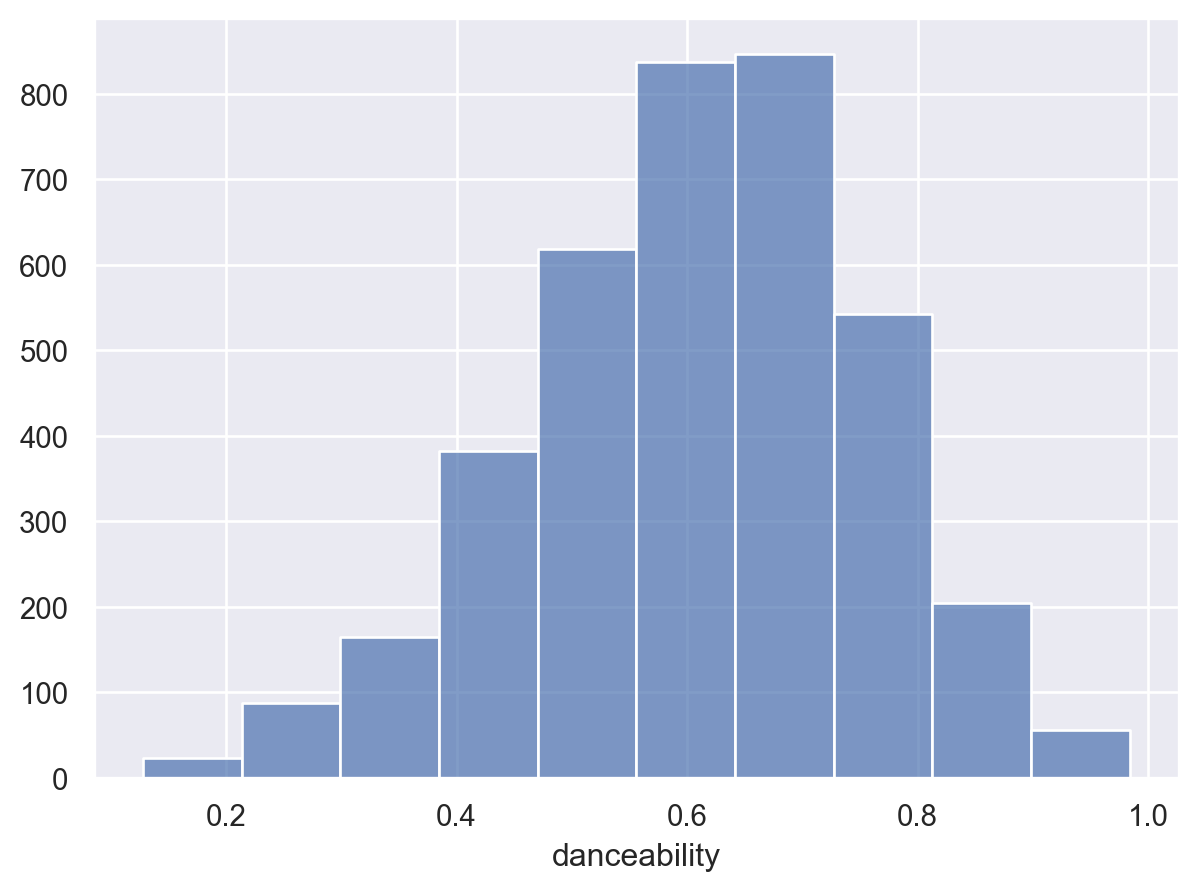

In [177]:
# If y_train is a Series
y_train_pandas = y_train.rename("danceability").to_frame()

# Plot histogram
(
    so.Plot(y_train_pandas, x="danceability")
    .add(so.Bars(), so.Hist(bins=10))
)

The danceability training sample follows the same distribution as the full sample.

We have also already one-hot encoded our dummy variables, so in the following cell we will drop one genre as a reference.

In [178]:
# Drop the 'classical' column as a reference for genre
X_train = X_train.drop(columns=["classical"])

# (4) Ordinary Least Squares (Frequentist)

Ordinary Least Squares (OLS) is a type of maximum likelihood estimation (MLE) that minimizes the sum of squared residuals and maximizes the likelhiood function. It is a frequentist method. OLS outputs point estimates (single numbers that represent our best guess of each parameter).

In [179]:
# Add constant for intercept
X_train = sm.add_constant(X_train)

# Fit the model
fit_04 = sm.OLS(y_train, X_train).fit()
fit_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     100.1
Date:                Wed, 24 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:29:20   Log-Likelihood:                 2797.0
No. Observations:                3764   AIC:                            -5546.
Df Residuals:                    3740   BIC:                            -5396.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5702      0.021     26.969      0.000       0.529       0.612
energy                  -0.1381      0.018     -7.701      0.000      -0.173      -0.103
key                     -0.0002      0.001     -0.362      0.717      -0.001       0.001
loudness                 0.0033      0.001      3.558      0.000       0.001       0.005
mode                    -0.0131      0.004     -3.085      0.002      -0.021      -0.005
acousticness            -0.0927      0.010     -9.119      0.000      -0.113      -0.073
valence                  0.2870      0.009     32.709      0.000       0.270       0.304
explicit                 0.0146      0.009      1.635      0.102      -0.003       0.032
instrumentalness_log     0.0017      0.001      3.333      0.001       0.001       0.003
liveness_log            -0.0210      0.003     -7.665      0.000      -0.026      -0.016
rock                    -0.0570      0.005    -12.338      0.000      -0.066      -0.048
pop                      0.0085      0.004      1.919      0.055      -0.000       0.017
rnb                      0.0121      0.006      2.041      0.041       0.000       0.024
edm                      0.0460      0.006      7.523      0.000       0.034       0.058
jazz                    -0.0633      0.017     -3.725      0.000      -0.097      -0.030
country                 -0.0190      0.009     -2.079      0.038      -0.037      -0.001
folk                     0.0127      0.007      1.730      0.084      -0.002       0.027
punk                    -0.0265      0.012     -2.210      0.027      -0.050      -0.003
metal                   -0.0376      0.008     -4.712      0.000      -0.053      -0.022
blues                   -0.0090      0.015     -0.604      0.546      -0.038       0.020
reggae                  -0.0090      0.017     -0.530      0.596      -0.042       0.024
world_music              0.0298      0.016      1.817      0.069      -0.002       0.062
other                    0.0150      0.014      1.087      0.277      -0.012       0.042
rap_hiphop               0.0831      0.007     12.085      0.000       0.070       0.097
==============================================================================
Omnibus:                       49.243   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.417
Skew:                          -0.267   Prob(JB):                     6.84e-12
Kurtosis:                       3.206   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Without tempo and track_duration_ms, our R-squared is 0.381. With tempo, our R-squared is closer to 0.500, but the OLS regression warned me about potentially high multicollinearity.

## Interpreting Parameter Estimates

Remember to consider "holding all other variables fixed", and how log transformations change the interpretation:
- y and x1: A one unit increase in x1 leads to a β1 unit change in y, holding all other variables fixed
- log(y) and x1: A one unit increase in x1 leads to a (exp(β1)−1)×100% change in y, holding all other variables fixed
- y and log(x1): A 1% increase in x1 leads to a β1/100 unit change in y, holding all other variables fixed
- log(y) and log(x1): A 1% increase in x1 leads to a β1% change in y, holding all other variables fixed

**EXAMPLE INTERPRETATION:**

Looking at the coef table, we can interpret the parameter estimates as follows:
• const: Not typically of interest, but the intercept parameter estimate says we can expect
about 1.86 log units of peanut butter sold with brand is Jif, there is no coupon or ad, texture
is Smooth, size is 16oz, and price is 0.
• brand_Harmons: Harmon’s peanut butter increases log units sold by about 0.26 or 29.84%
compared to Jif, holding all other variables fixed.
• brand_PeterPan: Peter Pan peanut butter decreases log units sold by about −0.12 or
−11.73% compared to Jif, holding all other variables fixed.
• brand_Skippy: Skippy peanut butter increases log units sold by about 0.0041 or 0.41%
compared to Jif, holding all other variables fixed.
• coupon: Having a coupon increases log units sold by about 0.40 or 48.63%, holding all other
variables fixed.
• ad: Having an ad increases log units sold by about 0.08 or 8.16%, holding all other variables
fixed.
• texture_Crunchy: Crunchy texture decreases log units sold by about −0.19 or −17.20%
compared to Smooth, holding all other variables fixed.
• size_12: 12 oz peanut butter increases log units sold by about 0.17 or 18.35% compared
to 16 oz, holding all other variables fixed.
• log_price: A 1% increase in price decreases log units sold by about −0.1145%, holding all
other variables fixed.
4


ENTER OUR INTERPRETATION HERE

# (5) Bayesian Models

With a Bayesian model, we start with a prior distribution over the possible parameter values, and update that prior distribution using data and the likelihood function. The result is a posterior distribution over the possible parameter values. Unlike Ordinary Least Squares, the output is an interval estimate for each parameter (a range of numbers that represents our best guess).

In [ ]:
# Analysis here

## Interpreting Bayesian Credible Intervals